# Data Description

# 데이터 분석 방식

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(suppress=True)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.figsize'] = (12, 9)

%matplotlib inline

# 데이터 로드

In [2]:
df = pd.read_excel('./bid_data.xlsx')

In [3]:
df.head(3)

,조달구분,입찰공고번호,공고게시일자,공고명,공사현장,입찰방식,입찰계약방법,예가방법,지역제한내용,기초금액,...,추정가격,예정가격,수요기관구분,낙찰업체목록내용,낙찰업체투찰률,낙찰업체투찰금액,낙찰하한율,공공조달분류명,예가,사정률
0,자체조달,20180100018,20180101,한울요양원 증축(소방설비)공사,광주광역시 북구,전자입찰,제한경쟁,복수예가,광주광역시,54277000.00000,...,49342728.00000,55041150.00000,기타기관,주식회사 창인산업[4098650981],87.77400,48312000.00000,87.74500,소방시설공사,101.40787,101.44177
1,자체조달,20180100020,20180101,한울요양원 증축(전기설비)공사,광주광역시 북구,전자입찰,제한경쟁,복수예가,광주광역시,38720000.00000,...,35200000.00000,38596350.00000,기타기관,주식회사 명진일렉[4098167041],87.74800,33867910.00000,87.74500,전기공사,99.68066,99.68520
2,자체조달,20180100030,20180101,2018년 아스팔트 포장도로 정비공사(연간단가),서울특별시 서초구,전자입찰,일반경쟁,복수예가,NaN,1290250000.00000,...,1172954546.00000,1278253950.00000,지자체,주식회사 푸른건설[1088115387],86.74600,1108842100.00000,86.74500,포장공사,99.07025,99.07210


# 데이터 기본 개요

In [4]:
df.columns

Index(['조달구분', '입찰공고번호', '공고게시일자', '공고명', '공사현장', '입찰방식', '입찰계약방법', '예가방법',
       '지역제한내용', '기초금액', '관급자설치관급자재금액', '도급자설치관급자재금액', '추정금액', '추정가격', '예정가격',
       '수요기관구분', '낙찰업체목록내용', '낙찰업체투찰률', '낙찰업체투찰금액', '낙찰하한율', '공공조달분류명', '예가',
       '사정률'],
      dtype='object')

**컬럼명 재정의**

In [5]:
df = df.rename(columns={'공고게시일자':'날짜', '공공조달분류명':'종목', '낙찰업체투찰금액':'낙찰금액'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501317 entries, 0 to 501316
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   조달구분         501317 non-null  object 
 1   입찰공고번호       501317 non-null  int64  
 2   날짜           501317 non-null  int64  
 3   공고명          501317 non-null  object 
 4   공사현장         501317 non-null  object 
 5   입찰방식         501317 non-null  object 
 6   입찰계약방법       501317 non-null  object 
 7   예가방법         501317 non-null  object 
 8   지역제한내용       481494 non-null  object 
 9   기초금액         468798 non-null  float64
 10  관급자설치관급자재금액  501238 non-null  float64
 11  도급자설치관급자재금액  501251 non-null  float64
 12  추정금액         499160 non-null  float64
 13  추정가격         497321 non-null  float64
 14  예정가격         470979 non-null  float64
 15  수요기관구분       501317 non-null  object 
 16  낙찰업체목록내용     450626 non-null  object 
 17  낙찰업체투찰률      472276 non-null  float64
 18  낙찰금액         472276 non-

In [7]:
df.describe()

,입찰공고번호,날짜,기초금액,관급자설치관급자재금액,도급자설치관급자재금액,추정금액,추정가격,예정가격,낙찰업체투찰률,낙찰금액,낙찰하한율,예가,사정률
count,501317.00000,501317.00000,468798.00000,501238.00000,501251.00000,499160.00000,497321.00000,470979.00000,472276.00000,472276.00000,483777.00000,468798.00000,457823.00000
mean,20193560885.67354,20193562.23882,305066759.36017,31918150.84183,60481193.32496,1359479464.67544,332957626.84192,305365241.02904,83.74361,262023189.29130,87.64024,inf,inf
std,9963591.04272,9960.11394,2103549989.81448,308711790.36517,485201065.86464,462168712193.42517,3379219660.79896,2109122672.17563,18.66560,2366546861.52559,1.07824,NaN,NaN
min,20171028569.00000,20180101.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.10000,64.06650,0.00000
25%,20181208231.00000,20181206.00000,42600000.00000,0.00000,0.00000,51780000.00000,39800000.00000,42525337.50000,87.74700,33935000.00000,87.74500,99.37928,99.43167
50%,20191021486.00000,20191018.00000,79900000.00000,0.00000,0.00000,97090500.00000,74649341.00000,79746525.00000,87.76800,65921775.00000,87.74500,99.89076,99.98247
75%,20200717960.00000,20200717.00000,179600000.00000,0.00000,25531180.00000,222601950.00000,169330000.00000,179815000.00000,87.87100,149634212.25000,87.74500,100.39189,100.53260
max,20210539414.00000,20210531.00000,329166849000.00000,65130869000.00000,115980000000.00000,231000002100000.00000,649499000000.00000,327728389925.00000,999.99900,592100000000.00000,100.00000,inf,inf


# null값 혹은 0값 처리

In [8]:
df.isnull().sum()

조달구분               0
입찰공고번호             0
날짜                 0
공고명                0
공사현장               0
입찰방식               0
입찰계약방법             0
예가방법               0
지역제한내용         19823
기초금액           32519
관급자설치관급자재금액       79
도급자설치관급자재금액       66
추정금액            2157
추정가격            3996
예정가격           30338
수요기관구분             0
낙찰업체목록내용       50691
낙찰업체투찰률        29041
낙찰금액           29041
낙찰하한율          17540
종목                 0
예가             32519
사정률            43494
dtype: int64

In [9]:
df[df['기초금액'].isnull()].head(3)

,조달구분,입찰공고번호,날짜,공고명,공사현장,입찰방식,입찰계약방법,예가방법,지역제한내용,기초금액,...,추정가격,예정가격,수요기관구분,낙찰업체목록내용,낙찰업체투찰률,낙찰금액,낙찰하한율,종목,예가,사정률
6,자체조달,20171236331,20180102,2017년 내산면 마전리 농업용수 관정개발,충청남도 부여군,전자입찰,수의(소액),복수예가,충청남도,NaN,...,25454545.00000,NaN,지자체,NaN,NaN,NaN,87.74500,기타시설공사,NaN,NaN
16,자체조달,20171239254,20180102,대전체육고 기숙사 및 급식실 수선 기계설비공사,대전광역시,전자입찰,일반경쟁,복수예가,NaN,NaN,...,883681819.00000,NaN,교육기관,NaN,NaN,NaN,86.74500,기계설비공사,NaN,NaN
27,중앙조달,20171235228,20180102,한국과학기술기획평가원 신사옥 건립사업 통신공사,충청북도,전자입찰,일반경쟁,복수예가,NaN,NaN,...,1410590000.00000,NaN,기타공공기관,NaN,NaN,NaN,NaN,정보통신공사,NaN,NaN


In [10]:
df[df['관급자설치관급자재금액'].isnull()].head(3)

,조달구분,입찰공고번호,날짜,공고명,공사현장,입찰방식,입찰계약방법,예가방법,지역제한내용,기초금액,...,추정가격,예정가격,수요기관구분,낙찰업체목록내용,낙찰업체투찰률,낙찰금액,낙찰하한율,종목,예가,사정률
5066,자체조달,20180119312,20180122,경동대학교 치기공학과 실습실 구축,강원도 원주시,직찰,일반경쟁,비예가,NaN,NaN,...,NaN,NaN,기타기관,NaN,NaN,NaN,NaN,실내건축공사,NaN,NaN
7905,자체조달,20180133178,20180201,보성축협 가축유통시설현대화사업장 신축공사,전라남도 보성군,전자입찰,제한경쟁,단일예가,전라남도,NaN,...,NaN,1915826400.00000,기타기관,이일산업 주식회사[4098147443],73.70100,1412000000.00000,NaN,건축공사,NaN,NaN
26800,자체조달,20180333969,20180321,2018년 청태산자연휴양림 오수정화처리시설 개선공사(전기),강원도 횡성군,전자시담,수의계약(기타),단일예가,NaN,NaN,...,NaN,8060000.00000,국가기관,주식회사 서희전기[2268148468],100.00000,8060000.00000,NaN,전기공사,NaN,NaN


In [11]:
df[df['도급자설치관급자재금액'].isnull()].head(3)

,조달구분,입찰공고번호,날짜,공고명,공사현장,입찰방식,입찰계약방법,예가방법,지역제한내용,기초금액,...,추정가격,예정가격,수요기관구분,낙찰업체목록내용,낙찰업체투찰률,낙찰금액,낙찰하한율,종목,예가,사정률
5066,자체조달,20180119312,20180122,경동대학교 치기공학과 실습실 구축,강원도 원주시,직찰,일반경쟁,비예가,NaN,NaN,...,NaN,NaN,기타기관,NaN,NaN,NaN,NaN,실내건축공사,NaN,NaN
7905,자체조달,20180133178,20180201,보성축협 가축유통시설현대화사업장 신축공사,전라남도 보성군,전자입찰,제한경쟁,단일예가,전라남도,NaN,...,NaN,1915826400.00000,기타기관,이일산업 주식회사[4098147443],73.70100,1412000000.00000,NaN,건축공사,NaN,NaN
9581,자체조달,20180208837,20180207,완도 5일시장 시설현대화 사업 전기 공사(전기) 취소공고,전라남도 완도군,전자입찰,제한경쟁,복수예가,전라남도,NaN,...,NaN,NaN,지자체,NaN,NaN,NaN,87.74500,전기공사,NaN,NaN


In [12]:
df[df['사정률'].isnull()].head(3)

,조달구분,입찰공고번호,날짜,공고명,공사현장,입찰방식,입찰계약방법,예가방법,지역제한내용,기초금액,...,추정가격,예정가격,수요기관구분,낙찰업체목록내용,낙찰업체투찰률,낙찰금액,낙찰하한율,종목,예가,사정률
6,자체조달,20171236331,20180102,2017년 내산면 마전리 농업용수 관정개발,충청남도 부여군,전자입찰,수의(소액),복수예가,충청남도,NaN,...,25454545.00000,NaN,지자체,NaN,NaN,NaN,87.74500,기타시설공사,NaN,NaN
16,자체조달,20171239254,20180102,대전체육고 기숙사 및 급식실 수선 기계설비공사,대전광역시,전자입찰,일반경쟁,복수예가,NaN,NaN,...,883681819.00000,NaN,교육기관,NaN,NaN,NaN,86.74500,기계설비공사,NaN,NaN
27,중앙조달,20171235228,20180102,한국과학기술기획평가원 신사옥 건립사업 통신공사,충청북도,전자입찰,일반경쟁,복수예가,NaN,NaN,...,1410590000.00000,NaN,기타공공기관,NaN,NaN,NaN,NaN,정보통신공사,NaN,NaN


In [13]:
df[df['낙찰금액'].isnull()].head(3)

,조달구분,입찰공고번호,날짜,공고명,공사현장,입찰방식,입찰계약방법,예가방법,지역제한내용,기초금액,...,추정가격,예정가격,수요기관구분,낙찰업체목록내용,낙찰업체투찰률,낙찰금액,낙찰하한율,종목,예가,사정률
6,자체조달,20171236331,20180102,2017년 내산면 마전리 농업용수 관정개발,충청남도 부여군,전자입찰,수의(소액),복수예가,충청남도,NaN,...,25454545.00000,NaN,지자체,NaN,NaN,NaN,87.74500,기타시설공사,NaN,NaN
16,자체조달,20171239254,20180102,대전체육고 기숙사 및 급식실 수선 기계설비공사,대전광역시,전자입찰,일반경쟁,복수예가,NaN,NaN,...,883681819.00000,NaN,교육기관,NaN,NaN,NaN,86.74500,기계설비공사,NaN,NaN
27,중앙조달,20171235228,20180102,한국과학기술기획평가원 신사옥 건립사업 통신공사,충청북도,전자입찰,일반경쟁,복수예가,NaN,NaN,...,1410590000.00000,NaN,기타공공기관,NaN,NaN,NaN,NaN,정보통신공사,NaN,NaN


**공고들 중 유찰된 공고 혹은 발주처에서 데이터 삭제를 요청한 경우 null값 혹은 0으로 입력된다.**

In [14]:
print('기초금액 0값 개수 : ', df['기초금액'][df['기초금액'] == 0.0000].count())
print('추정가격 0값 개수 : ', df['추정가격'][df['추정가격'] == 0.0000].count())
print('추정금액 0값 개수 : ', df['추정금액'][df['추정금액'] == 0.0000].count())
print('사정률 0값 개수 : ', df['사정률'][df['사정률'] == 0.0000].count())
print('예정가격 0값 개수 : ', df['예정가격'][df['예정가격'] == 0.0000].count())
print('낙찰업체투찰률 0값 개수 : ', df['낙찰업체투찰률'][df['낙찰업체투찰률'] == 0.0000].count())
print('낙찰금액 0값 개수 : ', df['낙찰금액'][df['낙찰금액'] == 0.0000].count())
print('낙찰하한율 0값 개수 : ', df['낙찰하한율'][df['낙찰하한율'] == 0.0000].count())
print('예가 0값 개수 : ', df['예가'][df['예가'] == 0.0000].count())

기초금액 0값 개수 :  1
추정가격 0값 개수 :  449
추정금액 0값 개수 :  548
사정률 0값 개수 :  20083
예정가격 0값 개수 :  8
낙찰업체투찰률 0값 개수 :  22096
낙찰금액 0값 개수 :  21651
낙찰하한율 0값 개수 :  0
예가 0값 개수 :  0


**관급자설치관급자재금액과 도급자설치관급자재금액에서 0 값이 굉장히 많다. 하지만 이 두 금액은 입찰에 영향을 주는 금액이 아닌 공사가 시작될 때 자재를 지원해줄 수 있는 금액을 의미하는 데이터이므로 제거해도 무방하다.**<br>

**사정률과 낙찰금액은 종속변수고 기초금액, 추정가격, 추정금액은 설명변수다. 다른 값으로 대체할 경우 제대로된 분석이 안될 수 있기 때문에 0 혹은 null 값은 제거한다.**

In [15]:
df = df.drop(['관급자설치관급자재금액', '도급자설치관급자재금액'], axis=1)

In [16]:
df = df.dropna(subset=['기초금액', '사정률', '낙찰금액'])

In [17]:
idx = df[(df['기초금액']==0.0000) | (df['낙찰금액']==0.0000) | (df['추정금액']==0.0000) | (df['추정가격']==0.0000)].index

df = df.drop(idx, axis=0)

**낙찰업체목록내용은 단순히 낙찰된 업체의 이름이기 때문에 역시 drop한다.**

In [18]:
df = df.drop(['낙찰업체목록내용'], axis=1)

**지역제한내용 컬럼의 null값은 지역에 대한 제한을 걸지 않겠다는 의미이므로 '제한없음'으로 채운다.**

In [19]:
df['지역제한내용'].fillna('제한없음', inplace=True)

In [20]:
df = df.reset_index(drop=True)

**null값과 0값 다시 확인**

In [21]:
df.isnull().sum()

조달구분       0
입찰공고번호     0
날짜         0
공고명        0
공사현장       0
입찰방식       0
입찰계약방법     0
예가방법       0
지역제한내용     0
기초금액       0
추정금액       0
추정가격       0
예정가격       0
수요기관구분     0
낙찰업체투찰률    0
낙찰금액       0
낙찰하한율      0
종목         0
예가         0
사정률        0
dtype: int64

In [22]:
print('기초금액 0값 개수 : ', df['기초금액'][df['기초금액'] == 0.0000].count())
print('추정가격 0값 개수 : ', df['추정가격'][df['추정가격'] == 0.0000].count())
print('추정금액 0값 개수 : ', df['추정금액'][df['추정금액'] == 0.0000].count())
print('사정률 0값 개수 : ', df['사정률'][df['사정률'] == 0.0000].count())
print('예정가격 0값 개수 : ', df['예정가격'][df['예정가격'] == 0.0000].count())
print('낙찰업체투찰률 0값 개수 : ', df['낙찰업체투찰률'][df['낙찰업체투찰률'] == 0.0000].count())
print('낙찰금액 0값 개수 : ', df['낙찰금액'][df['낙찰금액'] == 0.0000].count())
print('낙찰하한율 0값 개수 : ', df['낙찰하한율'][df['낙찰하한율'] == 0.0000].count())
print('예가 0값 개수 : ', df['예가'][df['예가'] == 0.0000].count())

기초금액 0값 개수 :  0
추정가격 0값 개수 :  0
추정금액 0값 개수 :  0
사정률 0값 개수 :  0
예정가격 0값 개수 :  0
낙찰업체투찰률 0값 개수 :  0
낙찰금액 0값 개수 :  0
낙찰하한율 0값 개수 :  0
예가 0값 개수 :  0


**낙찰하한율이 85 미만인 값은 drop**

In [23]:
idx = df[df['낙찰하한율'] < 85].index

df.drop(idx, axis=0, inplace=True)

In [24]:
df.describe()

,입찰공고번호,날짜,기초금액,추정금액,추정가격,예정가격,낙찰업체투찰률,낙찰금액,낙찰하한율,예가,사정률
count,437419.00000,437419.00000,437419.00000,437419.00000,437419.00000,437419.00000,437419.00000,437419.00000,437419.00000,437419.00000,437419.00000
mean,20193526119.32079,20193524.83136,207839438.58823,1313200059.18188,190045602.09548,207627109.29007,87.91338,181606413.95208,87.66860,99.87774,100.15800
std,9967653.88032,9964.41620,539884698.02425,493687031004.31256,493336980.09028,539403819.76032,0.94396,467645829.56344,0.28597,0.73119,1.33174
min,20171230928.00000,20180101.00000,2070.00000,144.00000,114.00000,2061.68000,78.12900,1809.50000,85.00000,88.65755,87.64855
25%,20181207350.50000,20181206.00000,41930000.00000,50730000.00000,38781819.00000,41861050.00000,87.74900,36834490.00000,87.74500,99.37377,99.51217
50%,20191018074.00000,20191016.00000,77781000.00000,93780000.00000,71606364.00000,77668375.00000,87.77300,68345000.00000,87.74500,99.88579,100.02605
75%,20200714528.00000,20200714.00000,169584500.00000,203729500.00000,154720909.00000,169316050.00000,87.88500,148896290.00000,87.74500,100.38807,100.56128
max,20210539414.00000,20210531.00000,10991273267.00000,231000002100000.00000,9992066607.00000,11011717500.00000,100.87600,9500838000.00000,98.00000,102.31618,115.85283


# object 타입 데이터 살펴보기

In [25]:
df.columns

Index(['조달구분', '입찰공고번호', '날짜', '공고명', '공사현장', '입찰방식', '입찰계약방법', '예가방법',
       '지역제한내용', '기초금액', '추정금액', '추정가격', '예정가격', '수요기관구분', '낙찰업체투찰률', '낙찰금액',
       '낙찰하한율', '종목', '예가', '사정률'],
      dtype='object')

In [26]:
df['공사현장'].value_counts()

서울특별시          9701
부산광역시          7207
대구광역시          4854
대전광역시          4669
광주광역시          4542
               ... 
국외소재             56
경기도 부천시 소사구      43
경기도 부천시 원미구      27
경기도 부천시 오정구      16
충청남도 연기군          2
Name: 공사현장, Length: 283, dtype: int64

In [27]:
df['조달구분'].value_counts()

자체조달    437350
중앙조달        69
Name: 조달구분, dtype: int64

In [28]:
df['지역제한내용'].value_counts()

경상북도                        35507
경기도                         34765
경기도                         31269
전라북도                        27909
경상남도                        26488
                            ...  
전라남도, 충청남도                      1
광주광역시, 전라남도, 전라북도               1
경상북도, 경상남도, 부산광역시, 대구광역시        1
전라남도, 전라북도                      1
부산광역시, 경상북도                     1
Name: 지역제한내용, Length: 203, dtype: int64

In [29]:
df['입찰계약방법'].value_counts()

수의(소액)                                  147571
수의(소액)-견적입찰(2인 이상 견적 제출)                134694
제한경쟁                                     72784
지역제한                                     68536
일반경쟁                                      4748
수의(소액)(단가)                                2168
수의(소액)(단가)-견적입찰(2인 이상 견적 제출)              2069
수의계약(기타)                                  1882
지명경쟁                                      1041
실적제한                                       398
제한경쟁(단가)                                   377
지역제한(단가)                                   348
수의계약(단가)                                   259
수의(소액)-견적입찰(단일응찰 허용)                       255
수의(소액)-여성기업또는장애인기업간견적입찰(2인 이상 견적 제출)       132
수의(소액)-여성기업간견적입찰(2인 이상 견적 제출)               53
지명경쟁(단가)                                    39
수의(소액)(여성기업간견적입찰)                           37
일반경쟁(단가)                                     7
수의(소액)-여성기업간견적입찰(단일응찰 허용)                    5
수의(소액)(단가)-견적입찰(단일응찰 허용)                     4
수의(소액)(여성기업 또

In [30]:
df['예가방법'].value_counts()

복수예가    437419
Name: 예가방법, dtype: int64

In [31]:
df['수요기관구분'].value_counts()

지자체           293445
교육기관           77920
기타기관           21663
국가기관           18884
준정부기관          10413
지방공기업           8719
기타공공기관          3721
공기업             1911
지자체 출자출연기관       743
Name: 수요기관구분, dtype: int64

In [32]:
df['종목'].value_counts()

전기공사            54864
철근콘크리트공사        40321
시설물유지관리공사       35221
토목공사            34850
기타시설공사          30690
포장공사            25155
상하수도설비공사        25067
건축공사            24539
조경식재공사          20888
정보통신공사          15893
금속구조물·창호공사      15321
실내건축공사          14358
기계설비공사          13644
토공사             13367
소방시설공사          13001
석공사             11684
도장공사             8901
조경시설물설치공사        6990
습식방수공사           6369
조경공사             6239
석면해체제거공사         5867
비계·구조물해체공사       4699
문화재수리공사          4542
지붕판금·건축물조립공사     1071
보링그라우팅공사          861
가스시설시공            767
수중공사              742
승강기설치공사           450
산업환경설비공사          406
준설공사              206
난방시공              199
철도궤도공사            161
강구조물공사             74
철강재설치공사             8
삭도설치공사              4
Name: 종목, dtype: int64

In [33]:
df['입찰방식'].value_counts()

전자입찰         437410
전자시담(다자간)         9
Name: 입찰방식, dtype: int64

**지역제한내용과 종목 컬럼은 인코딩을 진행한 후에 활용이 가능해 보인다.**

**본 분석에서는 전자입찰을 대상으로 분석을 진행할 예정이기 때문에 전자시담 방식은 제거한다.**

In [34]:
idx = df[df['입찰방식'].str.contains('전자시담')].index
df = df.drop(idx)
df.reset_index(drop=True, inplace=True)

In [35]:
df['입찰방식'].value_counts()

전자입찰    437410
Name: 입찰방식, dtype: int64

## 지역

In [36]:
df['지역제한내용'].value_counts()

경상북도                        35507
경기도                         34765
경기도                         31269
전라북도                        27909
경상남도                        26488
                            ...  
전라남도, 충청남도                      1
광주광역시, 전라남도, 전라북도               1
경상북도, 경상남도, 부산광역시, 대구광역시        1
전라남도, 전라북도                      1
부산광역시, 경상북도                     1
Name: 지역제한내용, Length: 203, dtype: int64

**공백 제거**

In [37]:
# 공백 제거
df['지역제한내용'] = df['지역제한내용'].str.replace(' ', '')

**지역을 ',' 기준으로 분리한다.**

In [38]:
area = df['지역제한내용'].str.split(',')

In [39]:
area.head()

0    [광주광역시]
1    [광주광역시]
2     [제한없음]
3    [서울특별시]
4    [서울특별시]
Name: 지역제한내용, dtype: object

**unique한 지역 이름 뽑아내기**

In [40]:
area_key = list(df['지역제한내용'].value_counts()[:18].keys())

In [41]:
area_key

['경기도',
 '경상북도',
 '전라남도',
 '경상남도',
 '전라북도',
 '충청남도',
 '강원도',
 '충청북도',
 '서울특별시',
 '부산광역시',
 '인천광역시',
 '대구광역시',
 '제한없음',
 '광주광역시',
 '대전광역시',
 '제주특별자치도',
 '울산광역시',
 '세종특별자치시']

**0으로 이루어진 데이터를 생성 후 데이터프레임으로 만들기**

In [42]:
area_data = np.zeros(shape=(len(area), 18))
area_data.shape

(437410, 18)

In [43]:
area_df = pd.DataFrame(columns=area_key, data=area_data)

In [44]:
area_df.head()

,경기도,경상북도,전라남도,경상남도,전라북도,충청남도,강원도,충청북도,서울특별시,부산광역시,인천광역시,대구광역시,제한없음,광주광역시,대전광역시,제주특별자치도,울산광역시,세종특별자치시
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


**지역과 지역값 컬럼 합치기**

In [45]:
area_merged = pd.concat([area, area_df], axis=1)
area_merged.tail()

,지역제한내용,경기도,경상북도,전라남도,경상남도,전라북도,충청남도,강원도,충청북도,서울특별시,부산광역시,인천광역시,대구광역시,제한없음,광주광역시,대전광역시,제주특별자치도,울산광역시,세종특별자치시
437405,[전라남도],0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
437406,[경상남도],0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
437407,[전라북도],0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
437408,[경상북도],0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
437409,[충청남도],0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


**리스트에 지역이 포함될 경우 1로 체크**

In [46]:
def check_area(data):
    for d in data['지역제한내용']:
        data[d] = 1
    return data

In [47]:
area = area_merged.apply(check_area, axis=1)
area.tail()

,지역제한내용,경기도,경상북도,전라남도,경상남도,전라북도,충청남도,강원도,충청북도,서울특별시,부산광역시,인천광역시,대구광역시,제한없음,광주광역시,대전광역시,제주특별자치도,울산광역시,세종특별자치시
437405,[전라남도],0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
437406,[경상남도],0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
437407,[전라북도],0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
437408,[경상북도],0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
437409,[충청남도],0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


**지역제한내용 컬럼은 drop**

In [48]:
area = area.drop('지역제한내용', 1)

## 종목

In [49]:
event = df['종목'].str.split(' ')

In [50]:
event

0         [소방시설공사]
1           [전기공사]
2           [포장공사]
3           [전기공사]
4           [토목공사]
            ...   
437405      [전기공사]
437406    [기타시설공사]
437407      [건축공사]
437408    [기타시설공사]
437409      [포장공사]
Name: 종목, Length: 437410, dtype: object

**unique한 종목 이름 추출하기**

In [51]:
event_key = list(df['종목'].value_counts().keys())

In [52]:
event_key

['전기공사',
 '철근콘크리트공사',
 '시설물유지관리공사',
 '토목공사',
 '기타시설공사',
 '포장공사',
 '상하수도설비공사',
 '건축공사',
 '조경식재공사',
 '정보통신공사',
 '금속구조물·창호공사',
 '실내건축공사',
 '기계설비공사',
 '토공사',
 '소방시설공사',
 '석공사',
 '도장공사',
 '조경시설물설치공사',
 '습식방수공사',
 '조경공사',
 '석면해체제거공사',
 '비계·구조물해체공사',
 '문화재수리공사',
 '지붕판금·건축물조립공사',
 '보링그라우팅공사',
 '가스시설시공',
 '수중공사',
 '승강기설치공사',
 '산업환경설비공사',
 '준설공사',
 '난방시공',
 '철도궤도공사',
 '강구조물공사',
 '철강재설치공사',
 '삭도설치공사']

**0으로 이루어진 데이터를 생성 후 데이터프레임으로 만들기**

In [53]:
event_data = np.zeros(shape=(df.shape[0], len(event_key)))
event_data.shape

(437410, 35)

In [54]:
event_df = pd.DataFrame(columns=event_key, data=event_data)

In [55]:
event_df

,전기공사,철근콘크리트공사,시설물유지관리공사,토목공사,기타시설공사,포장공사,상하수도설비공사,건축공사,조경식재공사,정보통신공사,...,가스시설시공,수중공사,승강기설치공사,산업환경설비공사,준설공사,난방시공,철도궤도공사,강구조물공사,철강재설치공사,삭도설치공사
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437405,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
437406,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
437407,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
437408,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


**종목과 종목값 컬럼 합치기**

In [56]:
event_merged = pd.concat([event, event_df], axis=1)

In [57]:
event_merged

,종목,전기공사,철근콘크리트공사,시설물유지관리공사,토목공사,기타시설공사,포장공사,상하수도설비공사,건축공사,조경식재공사,...,가스시설시공,수중공사,승강기설치공사,산업환경설비공사,준설공사,난방시공,철도궤도공사,강구조물공사,철강재설치공사,삭도설치공사
0,[소방시설공사],0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,[전기공사],0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,[포장공사],0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,[전기공사],0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,[토목공사],0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437405,[전기공사],0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
437406,[기타시설공사],0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
437407,[건축공사],0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
437408,[기타시설공사],0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


**리스트에 종목이 포함될 경우 1로 체크**

In [58]:
def check_event(data):
    for d in data['종목']:
        data[d] = 1
    return data

In [59]:
event = event_merged.apply(check_event, axis=1)
event.tail()

,종목,전기공사,철근콘크리트공사,시설물유지관리공사,토목공사,기타시설공사,포장공사,상하수도설비공사,건축공사,조경식재공사,...,가스시설시공,수중공사,승강기설치공사,산업환경설비공사,준설공사,난방시공,철도궤도공사,강구조물공사,철강재설치공사,삭도설치공사
437405,[전기공사],1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
437406,[기타시설공사],0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
437407,[건축공사],0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
437408,[기타시설공사],0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
437409,[포장공사],0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


**종목 컬럼은 drop**

In [60]:
event = event.drop('종목', 1)

In [61]:
event

,전기공사,철근콘크리트공사,시설물유지관리공사,토목공사,기타시설공사,포장공사,상하수도설비공사,건축공사,조경식재공사,정보통신공사,...,가스시설시공,수중공사,승강기설치공사,산업환경설비공사,준설공사,난방시공,철도궤도공사,강구조물공사,철강재설치공사,삭도설치공사
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437405,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
437406,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
437407,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
437408,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


# 날짜

**날짜 데이터 datetime형식으로 바꿔주기**

In [62]:
df = df.astype({'날짜':'str'})
df['날짜'] = pd.to_datetime(df['날짜'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437410 entries, 0 to 437409
Data columns (total 20 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   조달구분     437410 non-null  object        
 1   입찰공고번호   437410 non-null  int64         
 2   날짜       437410 non-null  datetime64[ns]
 3   공고명      437410 non-null  object        
 4   공사현장     437410 non-null  object        
 5   입찰방식     437410 non-null  object        
 6   입찰계약방법   437410 non-null  object        
 7   예가방법     437410 non-null  object        
 8   지역제한내용   437410 non-null  object        
 9   기초금액     437410 non-null  float64       
 10  추정금액     437410 non-null  float64       
 11  추정가격     437410 non-null  float64       
 12  예정가격     437410 non-null  float64       
 13  수요기관구분   437410 non-null  object        
 14  낙찰업체투찰률  437410 non-null  float64       
 15  낙찰금액     437410 non-null  float64       
 16  낙찰하한율    437410 non-null  float64       
 17  종목       4

## year, month, day를 각각 추출해서 데이터프레임에 추가하기

In [64]:
df['연도(year)'] = df['날짜'].dt.year
df['월(month)'] = df['날짜'].dt.month
df['일(day)'] = df['날짜'].dt.day
df['dayofweek'] = df['날짜'].dt.dayofweek
df['weekofyear'] = df['날짜'].dt.weekofyear
df['dayofyear'] = df['날짜'].dt.dayofyear
df['quarter'] = df['날짜'].dt.quarter

In [65]:
df.head(3)

,조달구분,입찰공고번호,날짜,공고명,공사현장,입찰방식,입찰계약방법,예가방법,지역제한내용,기초금액,...,종목,예가,사정률,연도(year),월(month),일(day),dayofweek,weekofyear,dayofyear,quarter
0,자체조달,20180100018,2018-01-01,한울요양원 증축(소방설비)공사,광주광역시 북구,전자입찰,제한경쟁,복수예가,광주광역시,54277000.00000,...,소방시설공사,101.40787,101.44177,2018,1,1,0,1,1,1
1,자체조달,20180100020,2018-01-01,한울요양원 증축(전기설비)공사,광주광역시 북구,전자입찰,제한경쟁,복수예가,광주광역시,38720000.00000,...,전기공사,99.68066,99.68520,2018,1,1,0,1,1,1
2,자체조달,20180100030,2018-01-01,2018년 아스팔트 포장도로 정비공사(연간단가),서울특별시 서초구,전자입찰,일반경쟁,복수예가,제한없음,1290250000.00000,...,포장공사,99.07025,99.07210,2018,1,1,0,1,1,1


# EDA

**금액, 가격 컬럼들의 데이터 타입 변경**

In [66]:
df = df.astype({'기초금액':'int64', '추정금액':'int64', '추정가격':'int64', '예정가격':'int64', '낙찰금액':'int64'})

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437410 entries, 0 to 437409
Data columns (total 27 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   조달구분        437410 non-null  object        
 1   입찰공고번호      437410 non-null  int64         
 2   날짜          437410 non-null  datetime64[ns]
 3   공고명         437410 non-null  object        
 4   공사현장        437410 non-null  object        
 5   입찰방식        437410 non-null  object        
 6   입찰계약방법      437410 non-null  object        
 7   예가방법        437410 non-null  object        
 8   지역제한내용      437410 non-null  object        
 9   기초금액        437410 non-null  int64         
 10  추정금액        437410 non-null  int64         
 11  추정가격        437410 non-null  int64         
 12  예정가격        437410 non-null  int64         
 13  수요기관구분      437410 non-null  object        
 14  낙찰업체투찰률     437410 non-null  float64       
 15  낙찰금액        437410 non-null  int64         
 16  낙찰

**예가 피처 탐색**

In [68]:
df.describe()['낙찰금액']

count       437410.00000
mean     181609329.12823
std      467650195.32621
min           1809.00000
25%       36834703.00000
50%       68348820.50000
75%      148898060.50000
max     9500838000.00000
Name: 낙찰금액, dtype: float64

왜도(skewness) 8.733264913038404
첨도(kurtosis) 105.31771612204913


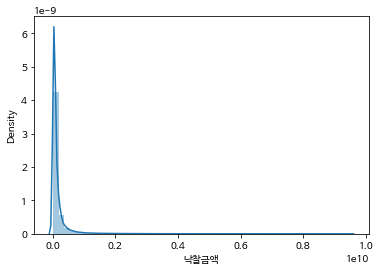

In [69]:
sns.distplot(df['낙찰금액'])

print('왜도(skewness)', df['낙찰금액'].skew())
print('첨도(kurtosis)', df['낙찰금액'].kurtosis())

{'whiskers': [<matplotlib.lines.Line2D at 0x140aca2f610>,
 'caps': [<matplotlib.lines.Line2D at 0x140aca2bbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x140aca2fa90>],
 'medians': [<matplotlib.lines.Line2D at 0x140aca2b2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x140aca24e20>],
 'means': []}

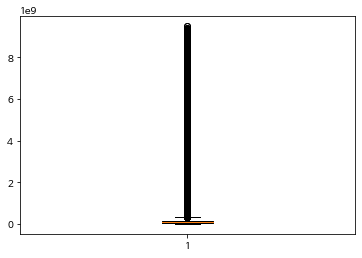

In [70]:
plt.boxplot(df['낙찰금액'])

왜도(skewness) 8.733264913038404
첨도(kurtosis) 105.31771612204913


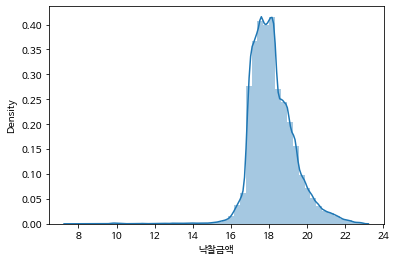

In [71]:
df_log = np.log(df['낙찰금액'])

sns.distplot(df_log)

print('왜도(skewness)', df['낙찰금액'].skew())
print('첨도(kurtosis)', df['낙찰금액'].kurtosis())

In [72]:
df['log_price'] = df_log
df

,조달구분,입찰공고번호,날짜,공고명,공사현장,입찰방식,입찰계약방법,예가방법,지역제한내용,기초금액,...,예가,사정률,연도(year),월(month),일(day),dayofweek,weekofyear,dayofyear,quarter,log_price
0,자체조달,20180100018,2018-01-01,한울요양원 증축(소방설비)공사,광주광역시 북구,전자입찰,제한경쟁,복수예가,광주광역시,54277000,...,101.40787,101.44177,2018,1,1,0,1,1,1,17.69319
1,자체조달,20180100020,2018-01-01,한울요양원 증축(전기설비)공사,광주광역시 북구,전자입찰,제한경쟁,복수예가,광주광역시,38720000,...,99.68066,99.68520,2018,1,1,0,1,1,1,17.33798
2,자체조달,20180100030,2018-01-01,2018년 아스팔트 포장도로 정비공사(연간단가),서울특별시 서초구,전자입찰,일반경쟁,복수예가,제한없음,1290250000,...,99.07025,99.07210,2018,1,1,0,1,1,1,20.82658
3,자체조달,20180100033,2018-01-01,2018년 한강공원 조명시설 유지보수공사(연간단가),서울특별시,전자입찰,지역제한,복수예가,서울특별시,449064000,...,100.27026,100.27351,2018,1,1,0,1,1,1,19.78321
4,자체조달,20180100028,2018-01-01,여의샛강 유입펌프장 증설공사,서울특별시,전자입찰,지역제한,복수예가,서울특별시,744823000,...,100.57926,100.59171,2018,1,1,0,1,1,1,20.30382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437405,자체조달,20210539219,2021-05-31,순천경찰서 삼산파출소 신축공사(전기),전라남도 순천시,전자입찰,수의(소액)-견적입찰(2인 이상 견적 제출),복수예가,전라남도,31097000,...,99.78270,99.78838,2021,5,31,0,22,151,2,17.11977
437406,자체조달,20210539239,2021-05-31,2021년 2차 미세먼지저감 숲가꾸기사업(봉산권빈 물밭골지구),경상남도 합천군,전자입찰,수의(소액),복수예가,경상남도,34284000,...,99.63292,99.67519,2021,5,31,0,22,151,2,17.21620
437407,자체조달,20210539245,2021-05-31,오성마을 한옥문화체험관 증축 건축공사,전라북도 완주군,전자입찰,제한경쟁,복수예가,전라북도,624590000,...,100.56326,101.36781,2021,5,31,0,22,151,2,20.13546
437408,자체조달,20210539194,2021-05-31,2021년 조림지풀베기 사업(6지구),경상북도 울진군,전자입찰,수의(소액)-견적입찰(2인 이상 견적 제출),복수예가,경상북도,42591000,...,100.81162,102.62920,2021,5,31,0,22,151,2,17.46237


**사정률 피처 탐색**

In [73]:
df.describe()['사정률']

count   437410.00000
mean       100.15792
std          1.33153
min         87.64855
25%         99.51215
50%        100.02600
75%        100.56127
max        115.85283
Name: 사정률, dtype: float64

**사정률 분포 및 첨도(kurtosis)와 왜도(skewness) 확인**

왜도(skewness) 5.8167138480308145
첨도(kurtosis) 50.77483692965786


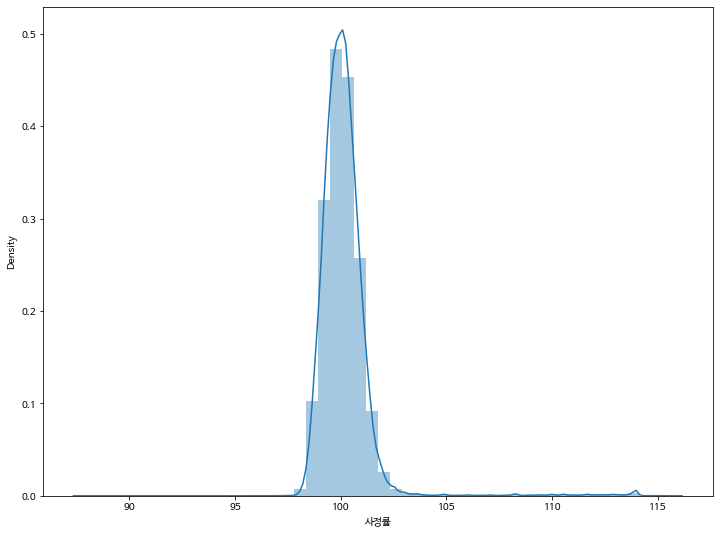

In [74]:
plt.rcParams['figure.figsize'] = (12, 9)

sns.distplot(df['사정률'])

print('왜도(skewness)', df['사정률'].skew())
print('첨도(kurtosis)', df['사정률'].kurtosis())

**왜도가 0.117로 데이터가 상당히 대칭적인 것을 알 수 있다.**<br>
**첨도는 35.365로 분포가 길고 꼬리가 길게 나있고 outlier가 존재한다는 의미다.**

{'whiskers': [<matplotlib.lines.Line2D at 0x140e8e0bd90>,
 'caps': [<matplotlib.lines.Line2D at 0x140e8e0b490>,
 'boxes': [<matplotlib.lines.Line2D at 0x140e8e0e250>],
 'medians': [<matplotlib.lines.Line2D at 0x140821993d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14082cb9ac0>],
 'means': []}

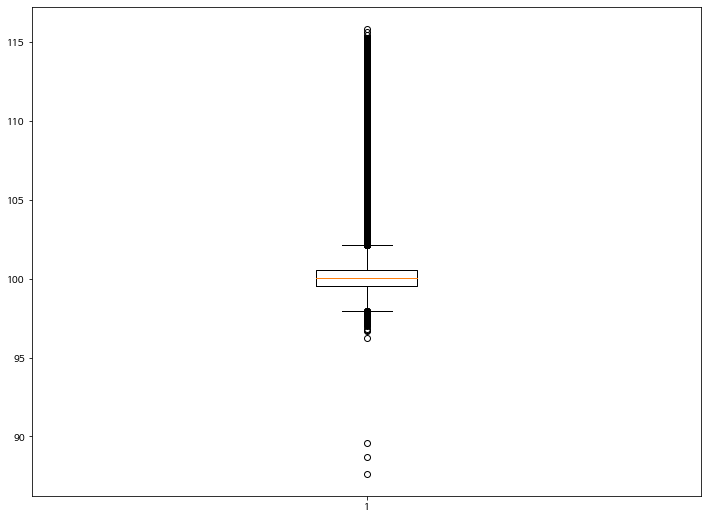

In [75]:
plt.boxplot(df['사정률'])

**수치형 변수들의 상관관계 탐색**

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437410 entries, 0 to 437409
Data columns (total 28 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   조달구분        437410 non-null  object        
 1   입찰공고번호      437410 non-null  int64         
 2   날짜          437410 non-null  datetime64[ns]
 3   공고명         437410 non-null  object        
 4   공사현장        437410 non-null  object        
 5   입찰방식        437410 non-null  object        
 6   입찰계약방법      437410 non-null  object        
 7   예가방법        437410 non-null  object        
 8   지역제한내용      437410 non-null  object        
 9   기초금액        437410 non-null  int64         
 10  추정금액        437410 non-null  int64         
 11  추정가격        437410 non-null  int64         
 12  예정가격        437410 non-null  int64         
 13  수요기관구분      437410 non-null  object        
 14  낙찰업체투찰률     437410 non-null  float64       
 15  낙찰금액        437410 non-null  int64         
 16  낙찰

In [77]:
cols = ['기초금액', '추정금액', '추정가격', '예정가격', '낙찰업체투찰률', '낙찰금액', '낙찰하한율', '사정률', '예가']

corr = df[cols].corr(method='pearson')

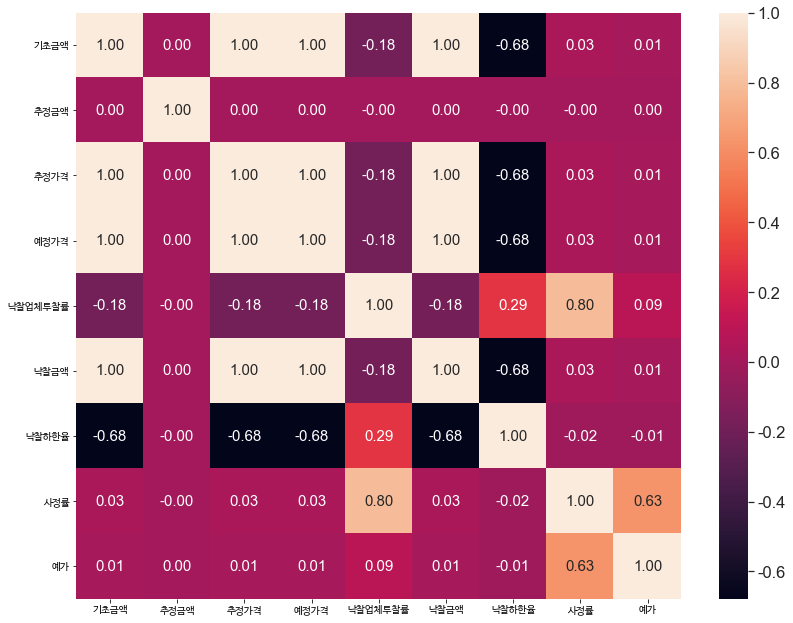

In [78]:
fig = plt.figure(figsize = (12, 9))
ax = fig.gca()

sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                 annot=True, 
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols,
                 ax=ax)
plt.tight_layout()
plt.show()

In [79]:
df[cols].corr()

,기초금액,추정금액,추정가격,예정가격,낙찰업체투찰률,낙찰금액,낙찰하한율,사정률,예가
기초금액,1.00000,0.00102,0.99855,0.99997,-0.18213,0.99991,-0.67861,0.02543,0.01058
추정금액,0.00102,1.00000,0.00101,0.00102,-0.00061,0.00102,-0.00034,-0.00032,0.00016
추정가격,0.99855,0.00101,1.00000,0.99852,-0.18202,0.99844,-0.67855,0.02540,0.01040
예정가격,0.99997,0.00102,0.99852,1.00000,-0.18202,0.99994,-0.67862,0.02708,0.01341
낙찰업체투찰률,-0.18213,-0.00061,-0.18202,-0.18202,1.00000,-0.17953,0.28743,0.79514,0.09434
낙찰금액,0.99991,0.00102,0.99844,0.99994,-0.17953,1.00000,-0.67827,0.02916,0.01366
낙찰하한율,-0.67861,-0.00034,-0.67855,-0.67862,0.28743,-0.67827,1.00000,-0.01898,-0.01027
사정률,0.02543,-0.00032,0.02540,0.02708,0.79514,0.02916,-0.01898,1.00000,0.63079
예가,0.01058,0.00016,0.01040,0.01341,0.09434,0.01366,-0.01027,0.63079,1.00000


**사후에 나오는 지표를 제외하면 기초금액과 추정가격 간에 상관관계가 매우 높다. 따라서 하나만 지정해서 활용하면 될 것으로 보인다. 그리고 추정금액 컬럼은 다른 컬럼들과 상관관계가 낮기 때문에 기초금액과 함께 활용하면 될 것으로 보인다.**<br><br>
**사정률은 설명변수와의 상관관계가 거의 없는데에 비해 낙찰금액은 설명변수와의 높은 상관관계를 보인다.**

**설명 변수와 종속 변수의 관계 탐색**

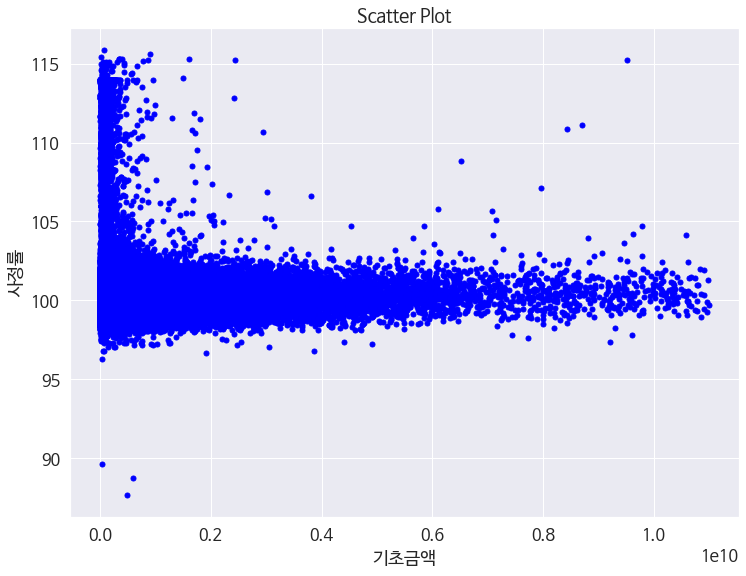

In [80]:
plt.rc('font', family='NanumBarunGothic')

plt.plot('기초금액', '사정률', 
         data=df,
         linestyle='none', 
         marker='o', 
         markersize=5,
         color='blue', 
         alpha=1)
plt.title('Scatter Plot')
plt.xlabel('기초금액')
plt.ylabel('사정률')
plt.show()

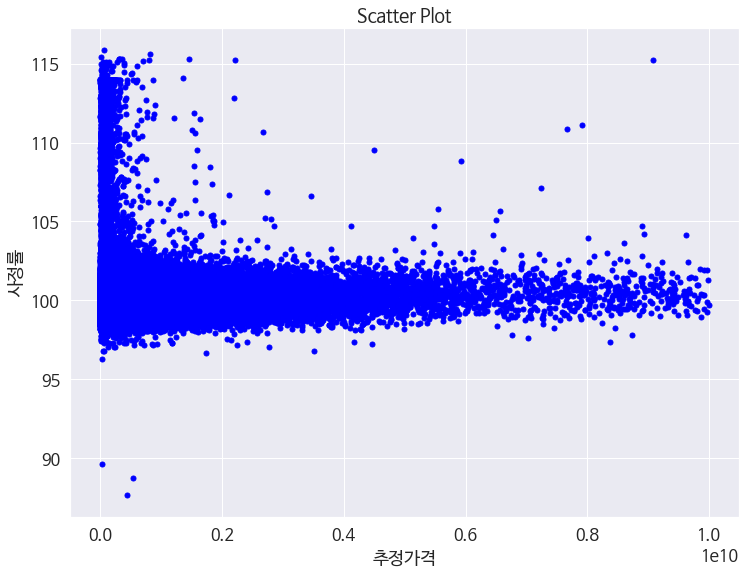

In [81]:
plt.plot('추정가격', '사정률', 
         data=df,
         linestyle='none', 
         marker='o', 
         markersize=5,
         color='blue', 
         alpha=1)
plt.title('Scatter Plot')
plt.xlabel('추정가격')
plt.ylabel('사정률')
plt.show()

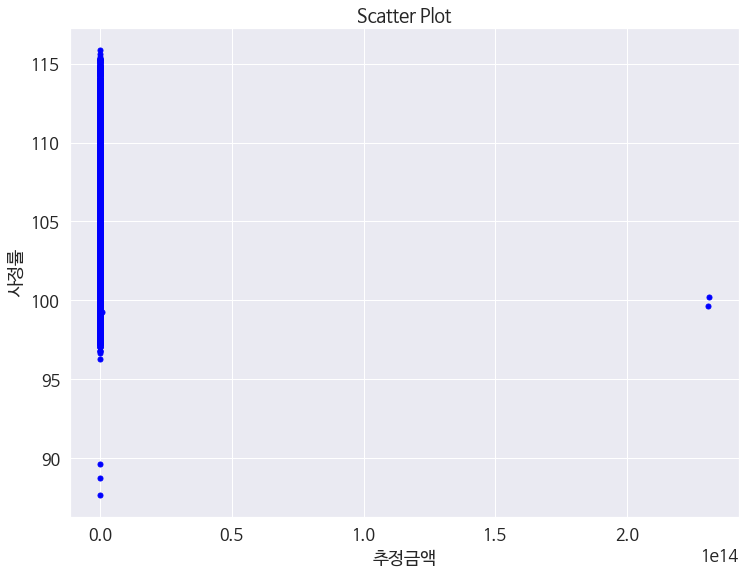

In [82]:
plt.plot('추정금액', '사정률', 
         data=df,
         linestyle='none', 
         marker='o', 
         markersize=5,
         color='blue', 
         alpha=1)
plt.title('Scatter Plot')
plt.xlabel('추정금액')
plt.ylabel('사정률')
plt.show()

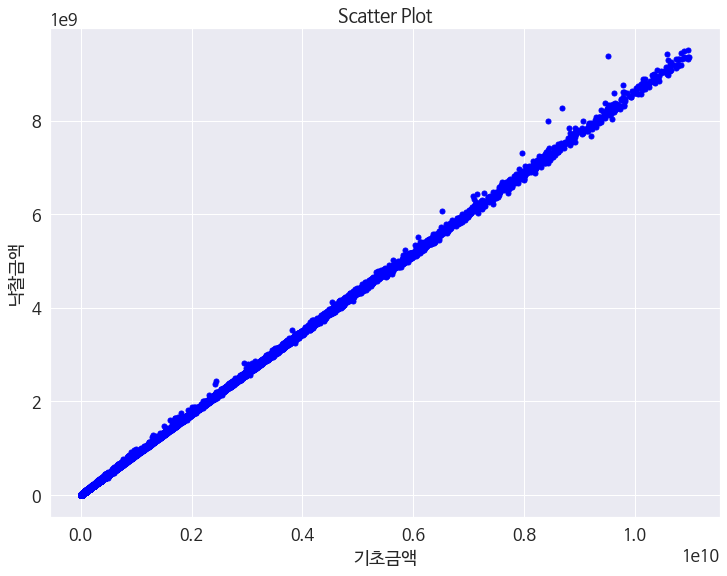

In [83]:
plt.rc('font', family='NanumBarunGothic')

plt.plot('기초금액', '낙찰금액', 
         data=df,
         linestyle='none', 
         marker='o', 
         markersize=5,
         color='blue', 
         alpha=1)
plt.title('Scatter Plot')
plt.xlabel('기초금액')
plt.ylabel('낙찰금액')
plt.show()

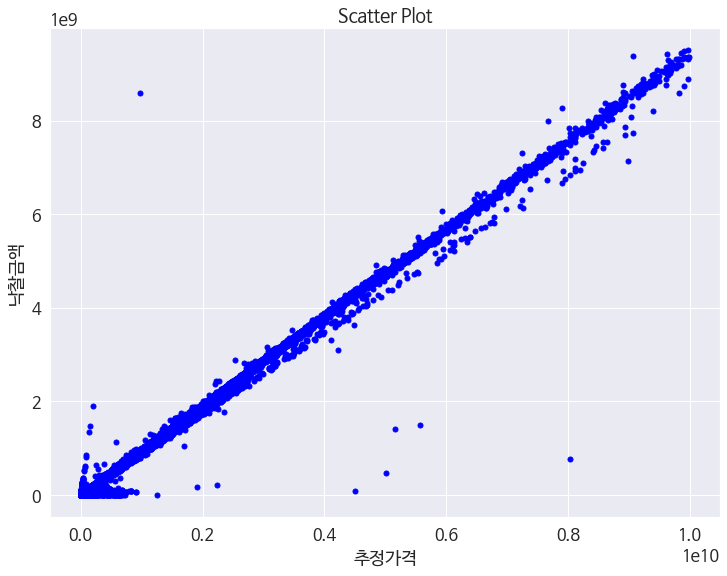

In [84]:
plt.rc('font', family='NanumBarunGothic')

plt.plot('추정가격', '낙찰금액', 
         data=df,
         linestyle='none', 
         marker='o', 
         markersize=5,
         color='blue', 
         alpha=1)
plt.title('Scatter Plot')
plt.xlabel('추정가격')
plt.ylabel('낙찰금액')
plt.show()

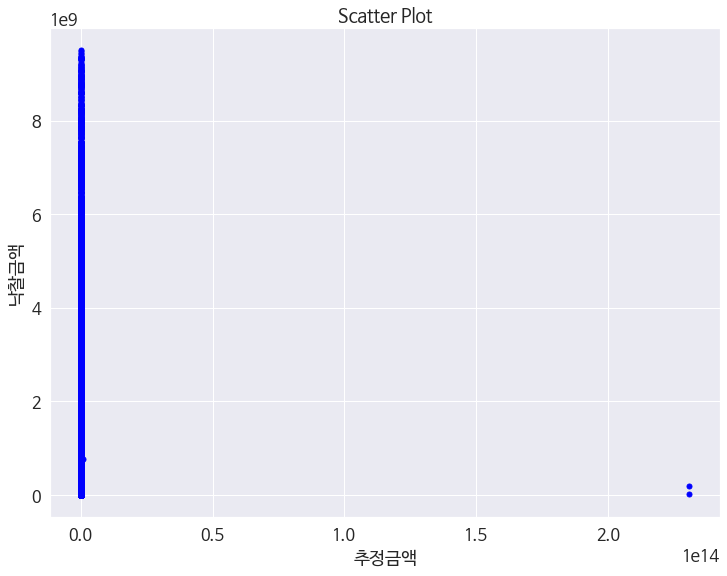

In [85]:
plt.rc('font', family='NanumBarunGothic')

plt.plot('추정금액', '낙찰금액', 
         data=df,
         linestyle='none', 
         marker='o', 
         markersize=5,
         color='blue', 
         alpha=1)
plt.title('Scatter Plot')
plt.xlabel('추정금액')
plt.ylabel('낙찰금액')
plt.show()

# 근접율 알아보기

In [86]:
df['근접율'] = abs(df['예가'] - df['사정률'])

In [87]:
df.head()

,조달구분,입찰공고번호,날짜,공고명,공사현장,입찰방식,입찰계약방법,예가방법,지역제한내용,기초금액,...,사정률,연도(year),월(month),일(day),dayofweek,weekofyear,dayofyear,quarter,log_price,근접율
0,자체조달,20180100018,2018-01-01,한울요양원 증축(소방설비)공사,광주광역시 북구,전자입찰,제한경쟁,복수예가,광주광역시,54277000,...,101.44177,2018,1,1,0,1,1,1,17.69319,0.03390
1,자체조달,20180100020,2018-01-01,한울요양원 증축(전기설비)공사,광주광역시 북구,전자입찰,제한경쟁,복수예가,광주광역시,38720000,...,99.68520,2018,1,1,0,1,1,1,17.33798,0.00454
2,자체조달,20180100030,2018-01-01,2018년 아스팔트 포장도로 정비공사(연간단가),서울특별시 서초구,전자입찰,일반경쟁,복수예가,제한없음,1290250000,...,99.07210,2018,1,1,0,1,1,1,20.82658,0.00185
3,자체조달,20180100033,2018-01-01,2018년 한강공원 조명시설 유지보수공사(연간단가),서울특별시,전자입찰,지역제한,복수예가,서울특별시,449064000,...,100.27351,2018,1,1,0,1,1,1,19.78321,0.00326
4,자체조달,20180100028,2018-01-01,여의샛강 유입펌프장 증설공사,서울특별시,전자입찰,지역제한,복수예가,서울특별시,744823000,...,100.59171,2018,1,1,0,1,1,1,20.30382,0.01245


<AxesSubplot:xlabel='근접율', ylabel='Density'>

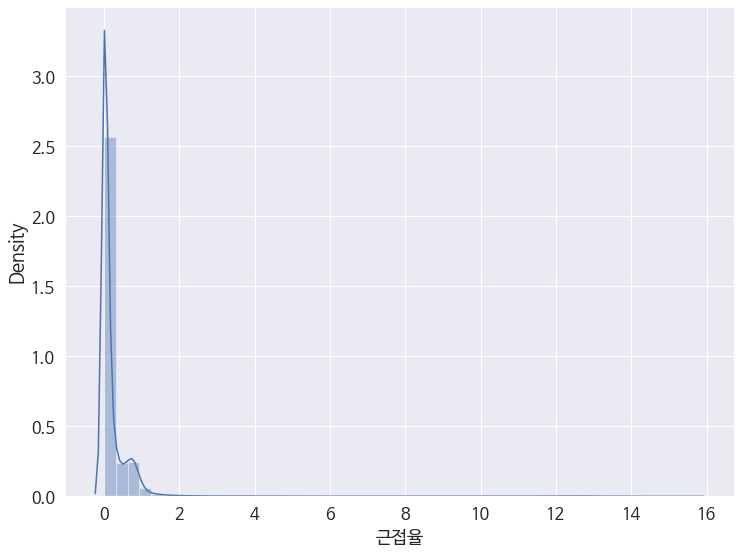

In [88]:
sns.distplot(df['근접율'])

<AxesSubplot:xlabel='근접율', ylabel='Density'>

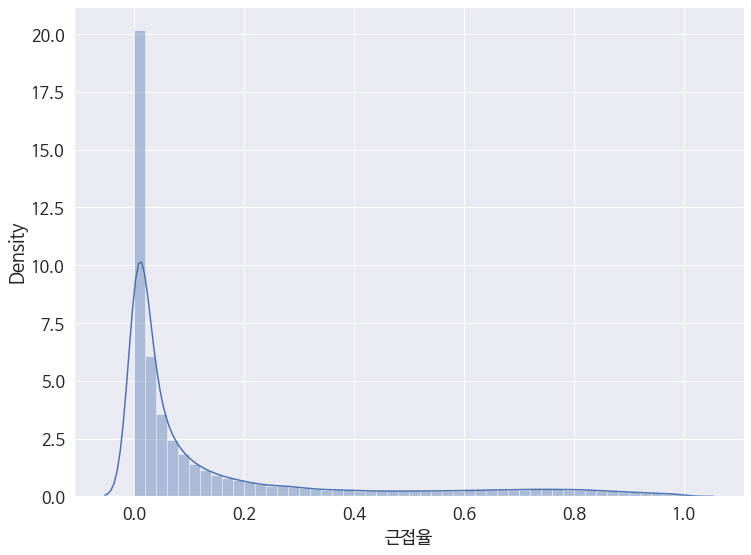

In [89]:
sns.distplot(df.loc[df['근접율'] < 1, '근접율'])

**대다수의 업체가 근접율을 0.0 ~ 0.2 이하로 가져가고 있다는 점을 볼 수 있다.**

**날짜와 사정률간 관계 탐색**

In [90]:
df_copy = df.copy()

In [91]:
df_copy.head(3)

,조달구분,입찰공고번호,날짜,공고명,공사현장,입찰방식,입찰계약방법,예가방법,지역제한내용,기초금액,...,사정률,연도(year),월(month),일(day),dayofweek,weekofyear,dayofyear,quarter,log_price,근접율
0,자체조달,20180100018,2018-01-01,한울요양원 증축(소방설비)공사,광주광역시 북구,전자입찰,제한경쟁,복수예가,광주광역시,54277000,...,101.44177,2018,1,1,0,1,1,1,17.69319,0.03390
1,자체조달,20180100020,2018-01-01,한울요양원 증축(전기설비)공사,광주광역시 북구,전자입찰,제한경쟁,복수예가,광주광역시,38720000,...,99.68520,2018,1,1,0,1,1,1,17.33798,0.00454
2,자체조달,20180100030,2018-01-01,2018년 아스팔트 포장도로 정비공사(연간단가),서울특별시 서초구,전자입찰,일반경쟁,복수예가,제한없음,1290250000,...,99.07210,2018,1,1,0,1,1,1,20.82658,0.00185


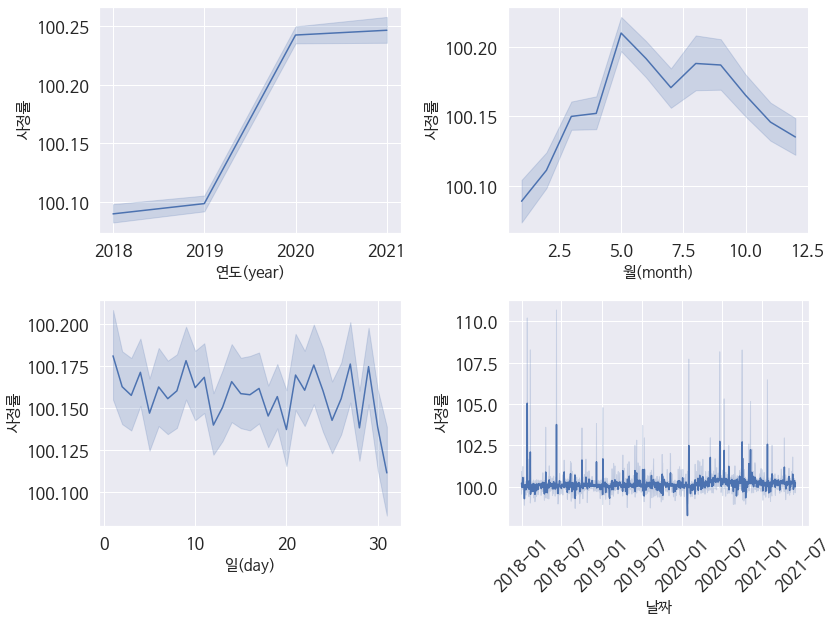

In [92]:
plt.rcParams['figure.figsize'] = (12, 9)
plt.rc('font', family='NanumBarunGothic')

plt.subplot(221)
sns.lineplot(df['연도(year)'], df['사정률'])
plt.xlabel('연도(year)', fontsize=15)
plt.ylabel('사정률', fontsize=15)

plt.subplot(222)
sns.lineplot(df['월(month)'], df['사정률'])
plt.xlabel('월(month)', fontsize=15)
plt.ylabel('사정률', fontsize=15)

plt.subplot(223)
sns.lineplot(df['일(day)'], df['사정률'])
plt.xlabel('일(day)', fontsize=15)
plt.ylabel('사정률', fontsize=15)

plt.subplot(224)
sns.lineplot(df['날짜'], df['사정률'])
plt.xlabel('날짜', fontsize=15)
plt.ylabel('사정률', fontsize=15)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [93]:
y_2018 = df[(df['날짜'] >= '2018-01-01') & (df['날짜'] <= '2018-12-31')]['날짜']
y_2019 = df[(df['날짜'] >= '2019-01-01') & (df['날짜'] <= '2019-12-31')]['날짜']
y_2020 = df[(df['날짜'] >= '2020-01-01') & (df['날짜'] <= '2020-12-31')]['날짜']
y_2021 = df[(df['날짜'] >= '2021-01-01') & (df['날짜'] <= '2021-05-31')]['날짜']

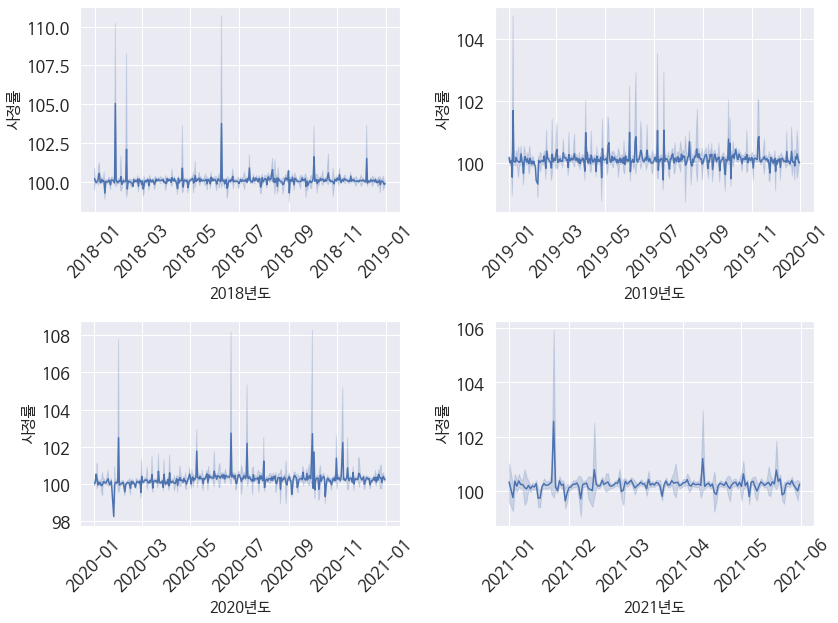

In [94]:
plt.rcParams['figure.figsize'] = (12, 9)
plt.rc('font', family='NanumBarunGothic')

plt.subplot(221)
sns.lineplot(y_2018, df['사정률'])
plt.xlabel('2018년도', fontsize=15)
plt.ylabel('사정률', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(222)
sns.lineplot(y_2019, df['사정률'])
plt.xlabel('2019년도', fontsize=15)
plt.ylabel('사정률', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(223)
sns.lineplot(y_2020, df['사정률'])
plt.xlabel('2020년도', fontsize=15)
plt.ylabel('사정률', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(224)
sns.lineplot(y_2021, df['사정률'])
plt.xlabel('2021년도', fontsize=15)
plt.ylabel('사정률', fontsize=15)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [95]:
df_copy = df.copy()

In [96]:
df_copy.set_index('날짜', inplace=True)

In [97]:
df_copy

,조달구분,입찰공고번호,공고명,공사현장,입찰방식,입찰계약방법,예가방법,지역제한내용,기초금액,추정금액,...,사정률,연도(year),월(month),일(day),dayofweek,weekofyear,dayofyear,quarter,log_price,근접율
날짜,,,,,,,,,,,,,,,,,,,,,
2018-01-01,자체조달,20180100018,한울요양원 증축(소방설비)공사,광주광역시 북구,전자입찰,제한경쟁,복수예가,광주광역시,54277000,54277000,...,101.44177,2018,1,1,0,1,1,1,17.69319,0.03390
2018-01-01,자체조달,20180100020,한울요양원 증축(전기설비)공사,광주광역시 북구,전자입찰,제한경쟁,복수예가,광주광역시,38720000,38720000,...,99.68520,2018,1,1,0,1,1,1,17.33798,0.00454
2018-01-01,자체조달,20180100030,2018년 아스팔트 포장도로 정비공사(연간단가),서울특별시 서초구,전자입찰,일반경쟁,복수예가,제한없음,1290250000,1290250000,...,99.07210,2018,1,1,0,1,1,1,20.82658,0.00185
2018-01-01,자체조달,20180100033,2018년 한강공원 조명시설 유지보수공사(연간단가),서울특별시,전자입찰,지역제한,복수예가,서울특별시,449064000,449064000,...,100.27351,2018,1,1,0,1,1,1,19.78321,0.00326
2018-01-01,자체조달,20180100028,여의샛강 유입펌프장 증설공사,서울특별시,전자입찰,지역제한,복수예가,서울특별시,744823000,744823000,...,100.59171,2018,1,1,0,1,1,1,20.30382,0.01245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,자체조달,20210539219,순천경찰서 삼산파출소 신축공사(전기),전라남도 순천시,전자입찰,수의(소액)-견적입찰(2인 이상 견적 제출),복수예가,전라남도,31097000,33941000,...,99.78838,2021,5,31,0,22,151,2,17.11977,0.00568
2021-05-31,자체조달,20210539239,2021년 2차 미세먼지저감 숲가꾸기사업(봉산권빈 물밭골지구),경상남도 합천군,전자입찰,수의(소액),복수예가,경상남도,34284000,34284000,...,99.67519,2021,5,31,0,22,151,2,17.21620,0.04227
2021-05-31,자체조달,20210539245,오성마을 한옥문화체험관 증축 건축공사,전라북도 완주군,전자입찰,제한경쟁,복수예가,전라북도,624590000,698562000,...,101.36781,2021,5,31,0,22,151,2,20.13546,0.80455


In [98]:
df_copy[['사정률']].diff()

,사정률
날짜,
2018-01-01,NaN
2018-01-01,-1.75657
2018-01-01,-0.61309
2018-01-01,1.20141
2018-01-01,0.31819
...,...
2021-05-31,-1.82362
2021-05-31,-0.11319
2021-05-31,1.69262


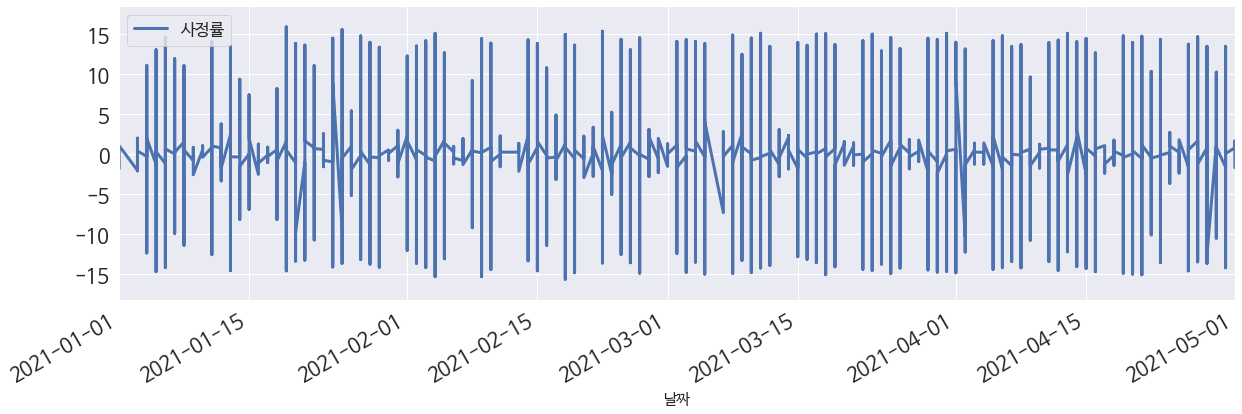

In [99]:
df_copy[['사정률']].diff().plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20, xlim=('2021-01-01', '2021-05-01'))

plt.xlabel('날짜', fontsize=15)
plt.show()

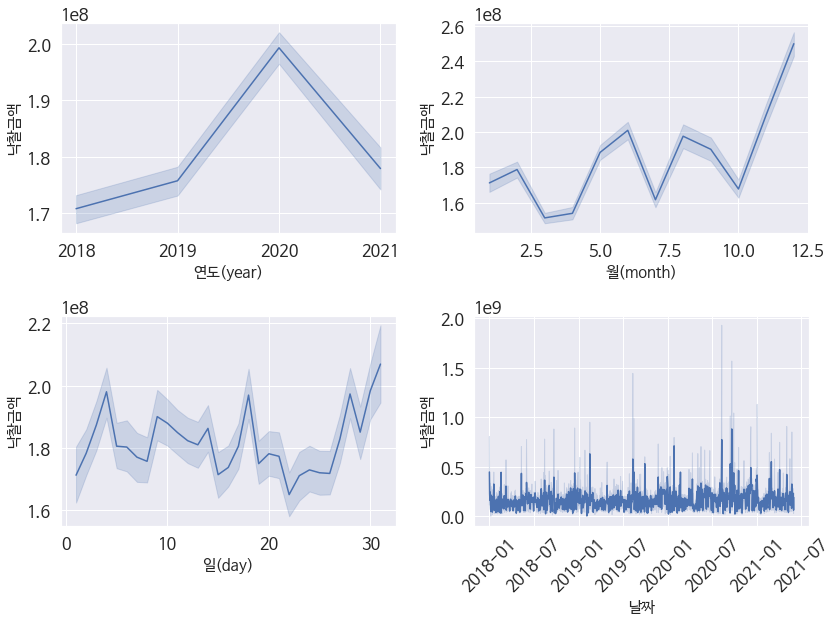

In [100]:
plt.rcParams['figure.figsize'] = (12, 9)
plt.rc('font', family='NanumBarunGothic')

plt.subplot(221)
sns.lineplot(df['연도(year)'], df['낙찰금액'])
plt.xlabel('연도(year)', fontsize=15)
plt.ylabel('낙찰금액', fontsize=15)

plt.subplot(222)
sns.lineplot(df['월(month)'], df['낙찰금액'])
plt.xlabel('월(month)', fontsize=15)
plt.ylabel('낙찰금액', fontsize=15)

plt.subplot(223)
sns.lineplot(df['일(day)'], df['낙찰금액'])
plt.xlabel('일(day)', fontsize=15)
plt.ylabel('낙찰금액', fontsize=15)

plt.subplot(224)
sns.lineplot(df['날짜'], df['낙찰금액'])
plt.xlabel('날짜', fontsize=15)
plt.ylabel('낙찰금액', fontsize=15)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

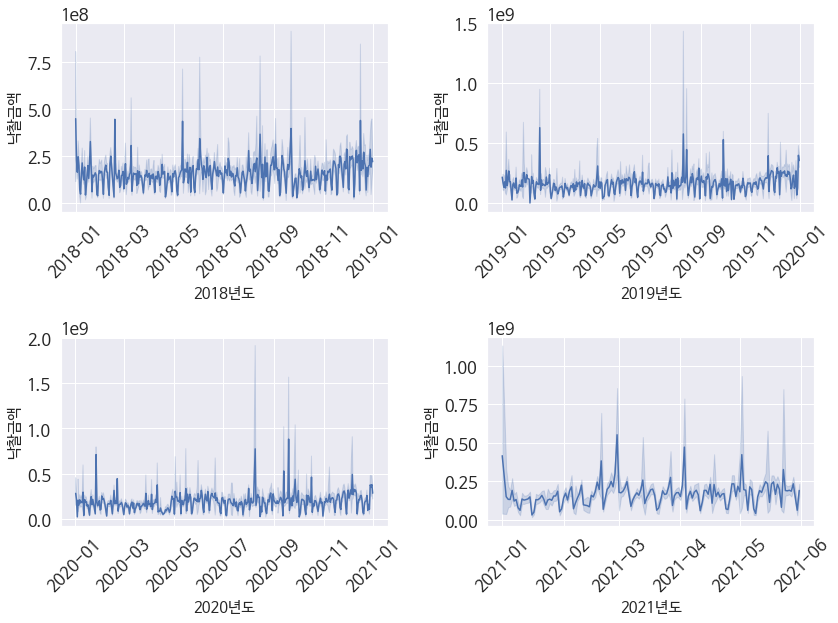

In [101]:
plt.rcParams['figure.figsize'] = (12, 9)
plt.rc('font', family='NanumBarunGothic')

plt.subplot(221)
sns.lineplot(y_2018, df['낙찰금액'])
plt.xlabel('2018년도', fontsize=15)
plt.ylabel('낙찰금액', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(222)
sns.lineplot(y_2019, df['낙찰금액'])
plt.xlabel('2019년도', fontsize=15)
plt.ylabel('낙찰금액', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(223)
sns.lineplot(y_2020, df['낙찰금액'])
plt.xlabel('2020년도', fontsize=15)
plt.ylabel('낙찰금액', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(224)
sns.lineplot(y_2021, df['낙찰금액'])
plt.xlabel('2021년도', fontsize=15)
plt.ylabel('낙찰금액', fontsize=15)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [102]:
df_copy[['낙찰금액']].diff()

,낙찰금액
날짜,
2018-01-01,NaN
2018-01-01,-14444090.00000
2018-01-01,1074974190.00000
2018-01-01,-718236087.00000
2018-01-01,266805987.00000
...,...
2021-05-31,-215413780.00000
2021-05-31,2756466.00000
2021-05-31,525557954.00000


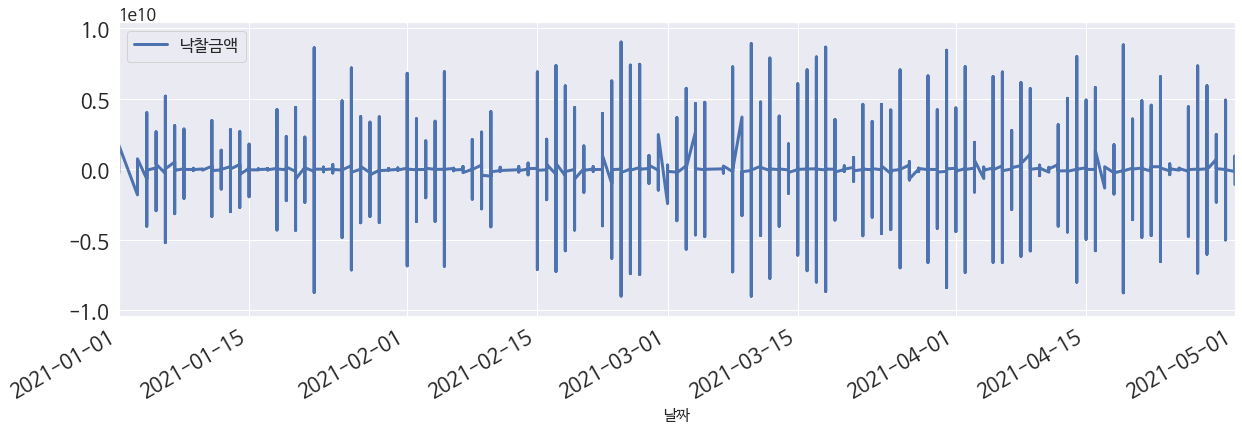

In [103]:
df_copy[['낙찰금액']].diff().plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20, xlim=('2021-01-01', '2021-05-01'))

plt.xlabel('날짜', fontsize=15)
plt.show()

**시,분,초에 대한 데이터는 없고 중복된 날짜가 많다. 또한 frequency도 설정할 수 없어 시계열 분석을 진행할 경우 부적절할 가능성이 있다. 또한 특별한 패턴도 보이지 않는다.**

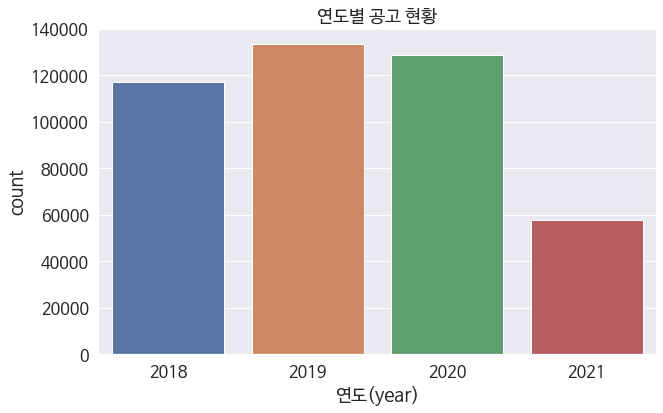

In [104]:
plt.figure(figsize=(10, 6))
sns.countplot(df['연도(year)'])
plt.title('연도별 공고 현황', fontsize=18)
plt.show()

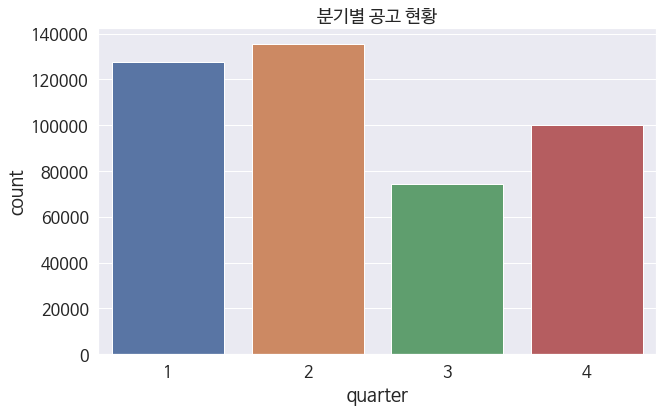

In [105]:
plt.figure(figsize=(10, 6))
sns.countplot(df['quarter'])
plt.title('분기별 공고 현황', fontsize=18)
plt.show()

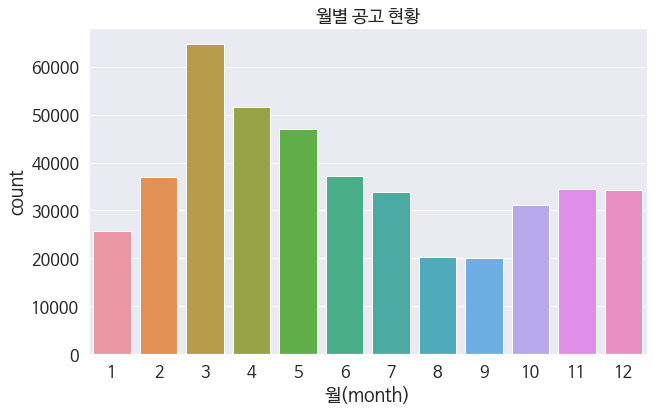

In [106]:
plt.figure(figsize=(10, 6))
sns.countplot(df['월(month)'])
plt.title('월별 공고 현황', fontsize=18)
plt.show()

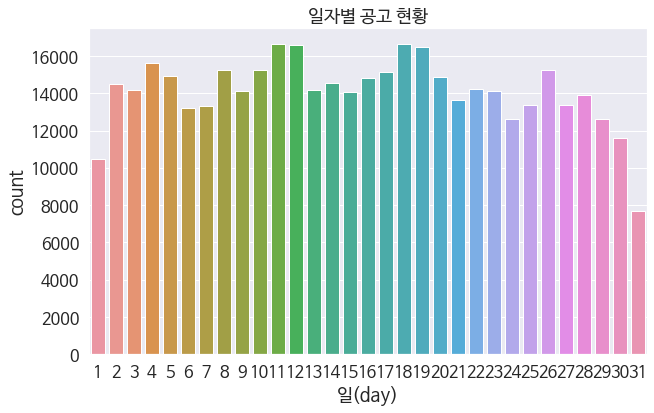

In [107]:
plt.figure(figsize=(10, 6))
sns.countplot(df['일(day)'])
plt.title('일자별 공고 현황', fontsize=18)
plt.show()

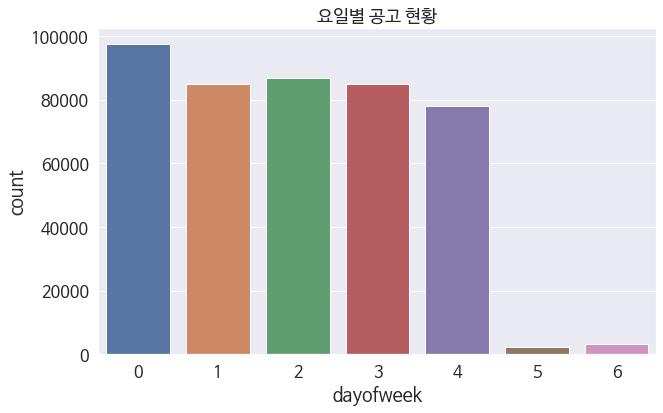

In [108]:
plt.figure(figsize=(10, 6))
sns.countplot(df['dayofweek'])
plt.title('요일별 공고 현황', fontsize=18)
plt.show()

## 데이터 정리

In [109]:
df.head(3)

,조달구분,입찰공고번호,날짜,공고명,공사현장,입찰방식,입찰계약방법,예가방법,지역제한내용,기초금액,...,사정률,연도(year),월(month),일(day),dayofweek,weekofyear,dayofyear,quarter,log_price,근접율
0,자체조달,20180100018,2018-01-01,한울요양원 증축(소방설비)공사,광주광역시 북구,전자입찰,제한경쟁,복수예가,광주광역시,54277000,...,101.44177,2018,1,1,0,1,1,1,17.69319,0.03390
1,자체조달,20180100020,2018-01-01,한울요양원 증축(전기설비)공사,광주광역시 북구,전자입찰,제한경쟁,복수예가,광주광역시,38720000,...,99.68520,2018,1,1,0,1,1,1,17.33798,0.00454
2,자체조달,20180100030,2018-01-01,2018년 아스팔트 포장도로 정비공사(연간단가),서울특별시 서초구,전자입찰,일반경쟁,복수예가,제한없음,1290250000,...,99.07210,2018,1,1,0,1,1,1,20.82658,0.00185


In [110]:
df.columns

Index(['조달구분', '입찰공고번호', '날짜', '공고명', '공사현장', '입찰방식', '입찰계약방법', '예가방법',
       '지역제한내용', '기초금액', '추정금액', '추정가격', '예정가격', '수요기관구분', '낙찰업체투찰률', '낙찰금액',
       '낙찰하한율', '종목', '예가', '사정률', '연도(year)', '월(month)', '일(day)',
       'dayofweek', 'weekofyear', 'dayofyear', 'quarter', 'log_price', '근접율'],
      dtype='object')

**인코딩을 진행한 지역 데이터 area와 종목 데이터 event를 합친다.**<br>
**지역은 서울, 인천, 제한없음만 포함시킨다.**<br>
**종목은 시설물유지관리공사, 건축공사, 실내건축공사, 석면해체제거공사, 비계·구조물해체공사만 포함시킨다.**

In [111]:
selected_area = area[['서울특별시', '인천광역시', '제한없음']]

In [112]:
selected_event = event[['시설물유지관리공사', '건축공사', '실내건축공사', '석면해체제거공사', '비계·구조물해체공사']]

In [113]:
df = pd.concat([df, selected_area, selected_event], axis=1)

In [114]:
df.dropna(subset=['기초금액', '낙찰금액', '사정률'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [115]:
df.isnull().sum()

조달구분          0
입찰공고번호        0
날짜            0
공고명           0
공사현장          0
입찰방식          0
입찰계약방법        0
예가방법          0
지역제한내용        0
기초금액          0
추정금액          0
추정가격          0
예정가격          0
수요기관구분        0
낙찰업체투찰률       0
낙찰금액          0
낙찰하한율         0
종목            0
예가            0
사정률           0
연도(year)      0
월(month)      0
일(day)        0
dayofweek     0
weekofyear    0
dayofyear     0
quarter       0
log_price     0
근접율           0
서울특별시         0
인천광역시         0
제한없음          0
시설물유지관리공사     0
건축공사          0
실내건축공사        0
석면해체제거공사      0
비계·구조물해체공사    0
dtype: int64

<AxesSubplot:xlabel='기초금액', ylabel='Density'>

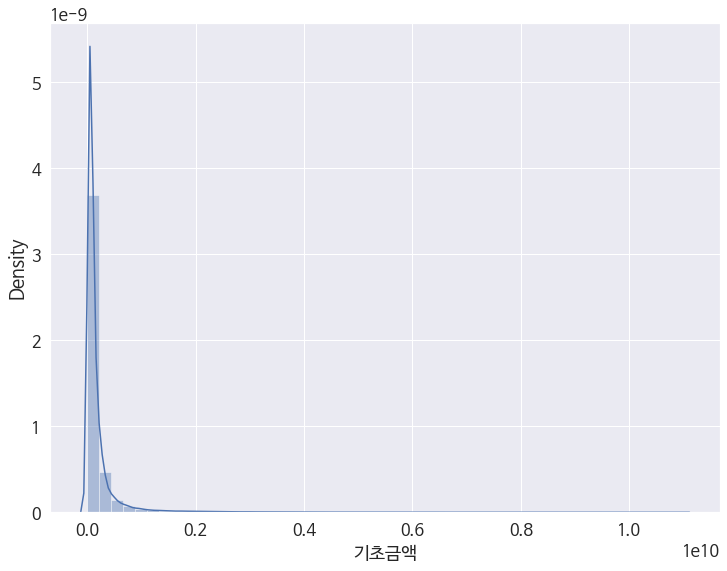

In [116]:
sns.distplot(df['기초금액'])

<AxesSubplot:xlabel='추정금액', ylabel='Density'>

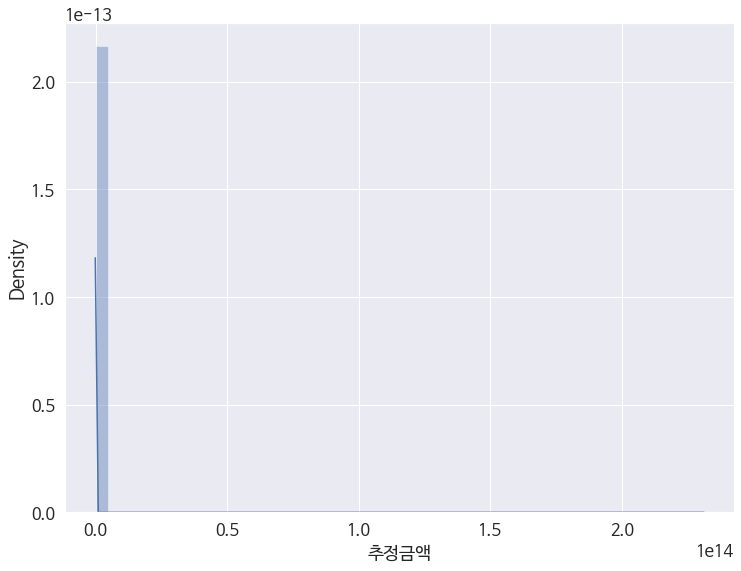

In [117]:
sns.distplot(df['추정금액'])

**낙찰금액을 로그변환 해줬기 떄문에 기초금액과 추정금액도 로그변환**

In [118]:
df['기초금액log'] = np.log(df['기초금액'])
df['추정금액log'] = np.log(df['추정금액'])
df

,조달구분,입찰공고번호,날짜,공고명,공사현장,입찰방식,입찰계약방법,예가방법,지역제한내용,기초금액,...,서울특별시,인천광역시,제한없음,시설물유지관리공사,건축공사,실내건축공사,석면해체제거공사,비계·구조물해체공사,기초금액log,추정금액log
0,자체조달,20180100018,2018-01-01,한울요양원 증축(소방설비)공사,광주광역시 북구,전자입찰,제한경쟁,복수예가,광주광역시,54277000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,17.80961,17.80961
1,자체조달,20180100020,2018-01-01,한울요양원 증축(전기설비)공사,광주광역시 북구,전자입찰,제한경쟁,복수예가,광주광역시,38720000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,17.47187,17.47187
2,자체조달,20180100030,2018-01-01,2018년 아스팔트 포장도로 정비공사(연간단가),서울특별시 서초구,전자입찰,일반경쟁,복수예가,제한없음,1290250000,...,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,20.97810,20.97810
3,자체조달,20180100033,2018-01-01,2018년 한강공원 조명시설 유지보수공사(연간단가),서울특별시,전자입찰,지역제한,복수예가,서울특별시,449064000,...,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,19.92268,19.92268
4,자체조달,20180100028,2018-01-01,여의샛강 유입펌프장 증설공사,서울특별시,전자입찰,지역제한,복수예가,서울특별시,744823000,...,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,20.42866,20.42866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437405,자체조달,20210539219,2021-05-31,순천경찰서 삼산파출소 신축공사(전기),전라남도 순천시,전자입찰,수의(소액)-견적입찰(2인 이상 견적 제출),복수예가,전라남도,31097000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,17.25262,17.34013
437406,자체조달,20210539239,2021-05-31,2021년 2차 미세먼지저감 숲가꾸기사업(봉산권빈 물밭골지구),경상남도 합천군,전자입찰,수의(소액),복수예가,경상남도,34284000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,17.35019,17.35019
437407,자체조달,20210539245,2021-05-31,오성마을 한옥문화체험관 증축 건축공사,전라북도 완주군,전자입찰,제한경쟁,복수예가,전라북도,624590000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,20.25261,20.36453
437408,자체조달,20210539194,2021-05-31,2021년 조림지풀베기 사업(6지구),경상북도 울진군,전자입찰,수의(소액)-견적입찰(2인 이상 견적 제출),복수예가,경상북도,42591000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,17.56715,17.56715


**낙찰된 후에 나오는 지표 및 categorical 데이터는 제외**<br>
**label 값은 낙찰금액으로 선정.**

In [166]:
train_df = df[['기초금액log', '추정금액log', '연도(year)', '월(month)', '일(day)', 'dayofweek', 'weekofyear', 'dayofyear', 'quarter',
               '서울특별시', '인천광역시', '제한없음', '시설물유지관리공사', '건축공사', '실내건축공사', '석면해체제거공사', 
               '비계·구조물해체공사', 'log_price']]

In [167]:
train_df

,기초금액log,추정금액log,연도(year),월(month),일(day),dayofweek,weekofyear,dayofyear,quarter,서울특별시,인천광역시,제한없음,시설물유지관리공사,건축공사,실내건축공사,석면해체제거공사,비계·구조물해체공사,log_price
0,17.80961,17.80961,2018,1,1,0,1,1,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,17.69319
1,17.47187,17.47187,2018,1,1,0,1,1,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,17.33798
2,20.97810,20.97810,2018,1,1,0,1,1,1,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,20.82658
3,19.92268,19.92268,2018,1,1,0,1,1,1,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,19.78321
4,20.42866,20.42866,2018,1,1,0,1,1,1,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,20.30382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437405,17.25262,17.34013,2021,5,31,0,22,151,2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,17.11977
437406,17.35019,17.35019,2021,5,31,0,22,151,2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,17.21620
437407,20.25261,20.36453,2021,5,31,0,22,151,2,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,20.13546
437408,17.56715,17.56715,2021,5,31,0,22,151,2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,17.46237


In [168]:
train_df = train_df.astype({'연도(year)':'int64', '월(month)':'int64', '일(day)':'int64', 'dayofweek':'int64', 'weekofyear':'int64',
                'dayofyear':'int64', 'quarter':'int64', '서울특별시':'int64', '인천광역시':'int64', '제한없음':'int64', 
                '시설물유지관리공사':'int64', '건축공사':'int64', '실내건축공사':'int64', '비계·구조물해체공사':'int64',
                '석면해체제거공사':'int64'})

In [169]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437410 entries, 0 to 437409
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   기초금액log     437410 non-null  float64
 1   추정금액log     437410 non-null  float64
 2   연도(year)    437410 non-null  int64  
 3   월(month)    437410 non-null  int64  
 4   일(day)      437410 non-null  int64  
 5   dayofweek   437410 non-null  int64  
 6   weekofyear  437410 non-null  int64  
 7   dayofyear   437410 non-null  int64  
 8   quarter     437410 non-null  int64  
 9   서울특별시       437410 non-null  int64  
 10  인천광역시       437410 non-null  int64  
 11  제한없음        437410 non-null  int64  
 12  시설물유지관리공사   437410 non-null  int64  
 13  건축공사        437410 non-null  int64  
 14  실내건축공사      437410 non-null  int64  
 15  석면해체제거공사    437410 non-null  int64  
 16  비계·구조물해체공사  437410 non-null  int64  
 17  log_price   437410 non-null  float64
dtypes: float64(3), int64(15)
memory usage: 60.1 

# 입찰 예측 분석 : 회귀분석

In [123]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

## 모델별 성능 확인을 위한 함수

In [124]:
from math import sqrt

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 5))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    np.set_printoptions(suppress=True)
    global predictions
    global colors
    
    plot_predictions(name_, pred, actual)

    rmse = sqrt(mean_squared_error(pred, actual))
    my_predictions[name_] = rmse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'rmse'])
    print(df)
    min_ = df['rmse'].min() - 10
    max_ = df['rmse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['rmse'])
    
    for i, v in enumerate(df['rmse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 0, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('RMSE Error', fontsize=18)
#     plt.xlim(0.0, 0.5)
    
    plt.show()

**데이터 분리**

In [170]:
train_features = train_df.drop('log_price', axis=1)

In [171]:
train_features

,기초금액log,추정금액log,연도(year),월(month),일(day),dayofweek,weekofyear,dayofyear,quarter,서울특별시,인천광역시,제한없음,시설물유지관리공사,건축공사,실내건축공사,석면해체제거공사,비계·구조물해체공사
0,17.80961,17.80961,2018,1,1,0,1,1,1,0,0,0,0,0,0,0,0
1,17.47187,17.47187,2018,1,1,0,1,1,1,0,0,0,0,0,0,0,0
2,20.97810,20.97810,2018,1,1,0,1,1,1,0,0,1,0,0,0,0,0
3,19.92268,19.92268,2018,1,1,0,1,1,1,1,0,0,0,0,0,0,0
4,20.42866,20.42866,2018,1,1,0,1,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437405,17.25262,17.34013,2021,5,31,0,22,151,2,0,0,0,0,0,0,0,0
437406,17.35019,17.35019,2021,5,31,0,22,151,2,0,0,0,0,0,0,0,0
437407,20.25261,20.36453,2021,5,31,0,22,151,2,0,0,0,0,1,0,0,0
437408,17.56715,17.56715,2021,5,31,0,22,151,2,0,0,0,0,0,0,0,0


In [172]:
train_label = train_df['log_price']

In [173]:
train_label

0        17.69319
1        17.33798
2        20.82658
3        19.78321
4        20.30382
           ...   
437405   17.11977
437406   17.21620
437407   20.13546
437408   17.46237
437409   17.05684
Name: log_price, Length: 437410, dtype: float64

In [221]:
x_train, x_test, y_train, y_test = train_test_split(train_features, train_label, test_size=0.3, random_state=42)

In [175]:
x_train.shape, x_test.shape

((306187, 17), (131223, 17))

In [176]:
x_train.head()

,기초금액log,추정금액log,연도(year),월(month),일(day),dayofweek,weekofyear,dayofyear,quarter,서울특별시,인천광역시,제한없음,시설물유지관리공사,건축공사,실내건축공사,석면해체제거공사,비계·구조물해체공사
261070,18.04288,18.42068,2020,2,12,2,7,43,1,0,0,0,1,0,0,0,0
109174,19.97088,19.97088,2018,12,6,3,49,340,4,0,0,0,0,0,0,0,0
205921,17.41156,17.74765,2019,8,30,4,35,242,3,0,0,0,0,0,0,0,0
116393,16.46183,16.46183,2018,12,26,2,52,360,4,0,0,0,1,0,0,0,0
104467,19.50248,19.57771,2018,11,22,3,47,326,4,0,0,0,0,0,0,0,0


In [177]:
y_train.head()

261070   17.90950
109174   19.84829
205921   17.28308
116393   16.32657
104467   19.37368
Name: log_price, dtype: float64

**LinearRegression**

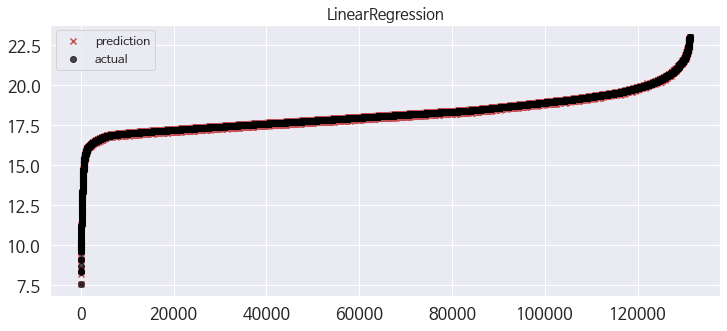

              model    rmse
0  LinearRegression 0.01311


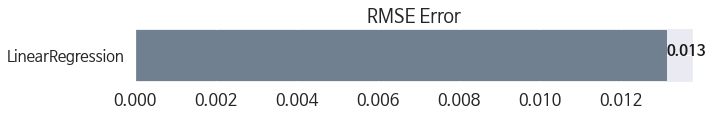

In [133]:
linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(x_train, y_train)
linear_pred = linear_reg.predict(x_test)
mse_eval('LinearRegression', linear_pred, y_test)

**Ridge**

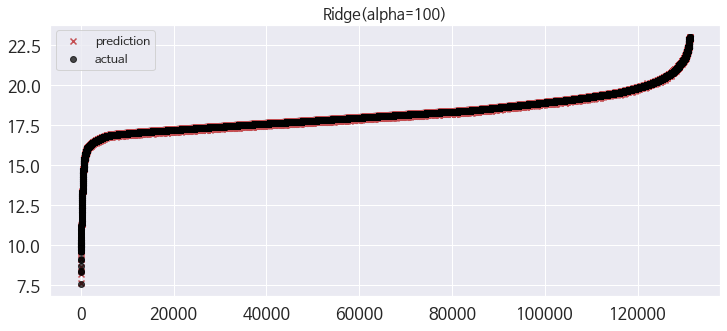

              model    rmse
0  Ridge(alpha=100) 0.01313
1  LinearRegression 0.01311


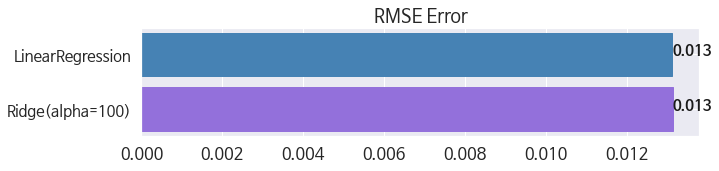

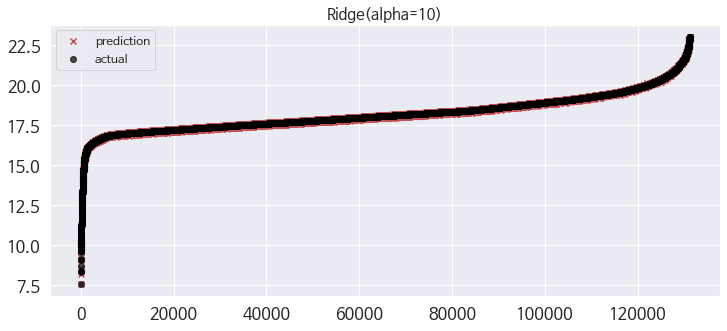

              model    rmse
0  Ridge(alpha=100) 0.01313
1   Ridge(alpha=10) 0.01311
2  LinearRegression 0.01311


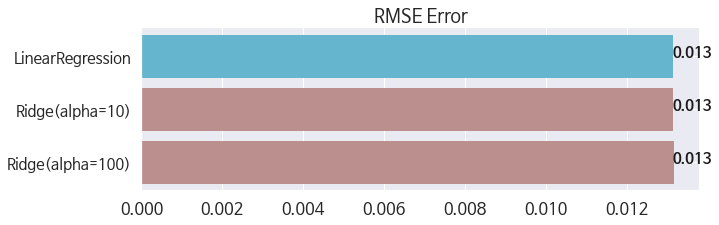

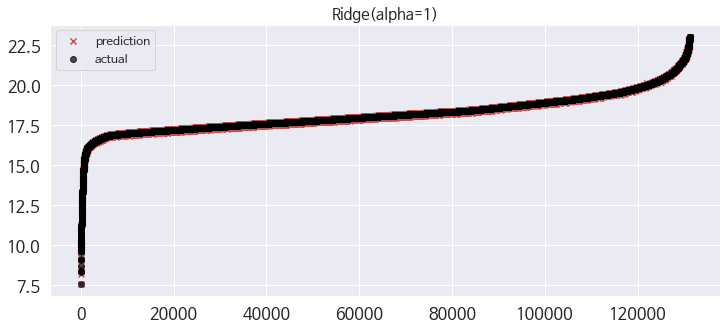

              model    rmse
0  Ridge(alpha=100) 0.01313
1   Ridge(alpha=10) 0.01311
2  LinearRegression 0.01311
3    Ridge(alpha=1) 0.01311


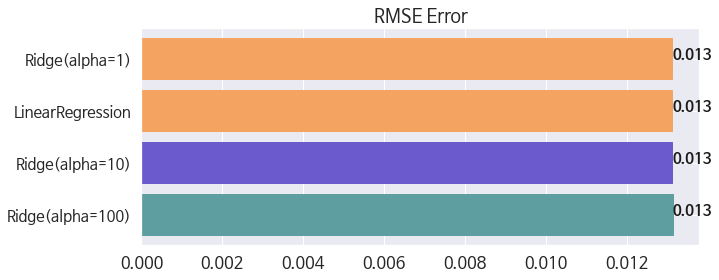

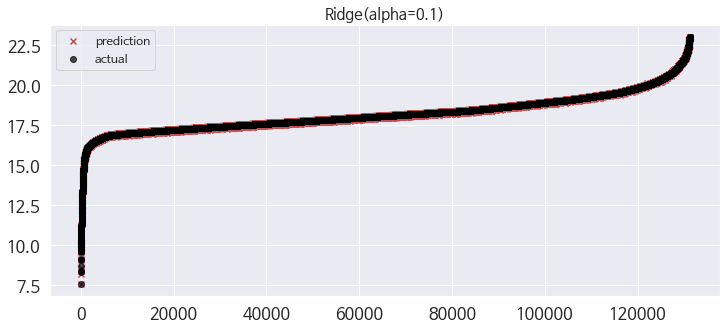

              model    rmse
0  Ridge(alpha=100) 0.01313
1   Ridge(alpha=10) 0.01311
2  LinearRegression 0.01311
3  Ridge(alpha=0.1) 0.01311
4    Ridge(alpha=1) 0.01311


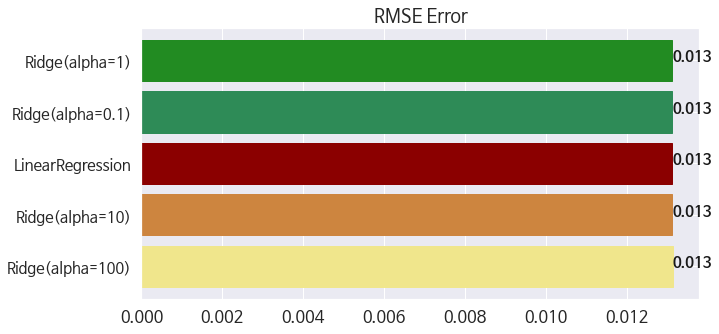

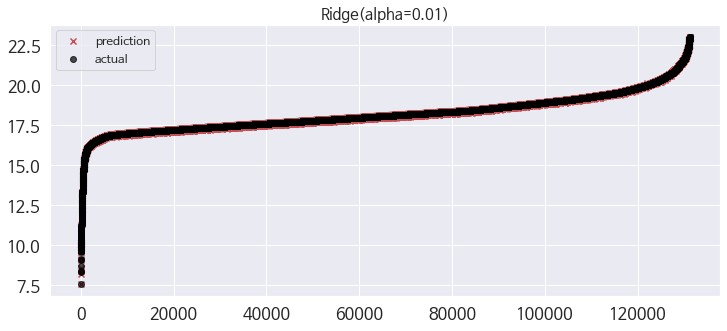

               model    rmse
0   Ridge(alpha=100) 0.01313
1    Ridge(alpha=10) 0.01311
2   LinearRegression 0.01311
3  Ridge(alpha=0.01) 0.01311
4   Ridge(alpha=0.1) 0.01311
5     Ridge(alpha=1) 0.01311


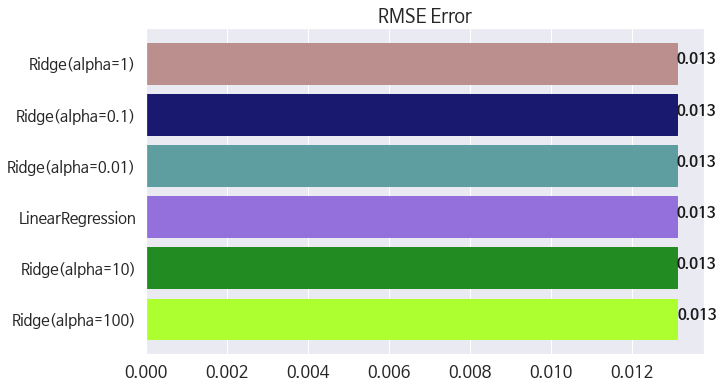

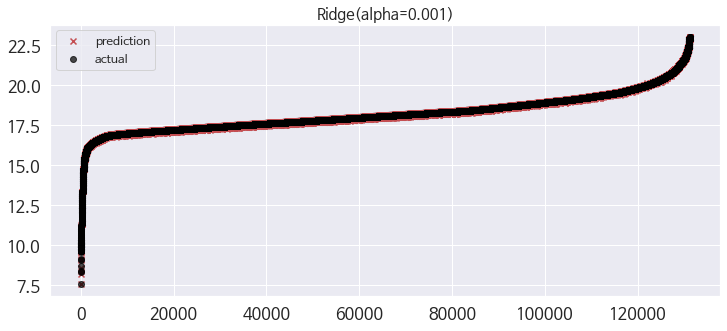

                model    rmse
0    Ridge(alpha=100) 0.01313
1     Ridge(alpha=10) 0.01311
2    LinearRegression 0.01311
3  Ridge(alpha=0.001) 0.01311
4   Ridge(alpha=0.01) 0.01311
5    Ridge(alpha=0.1) 0.01311
6      Ridge(alpha=1) 0.01311


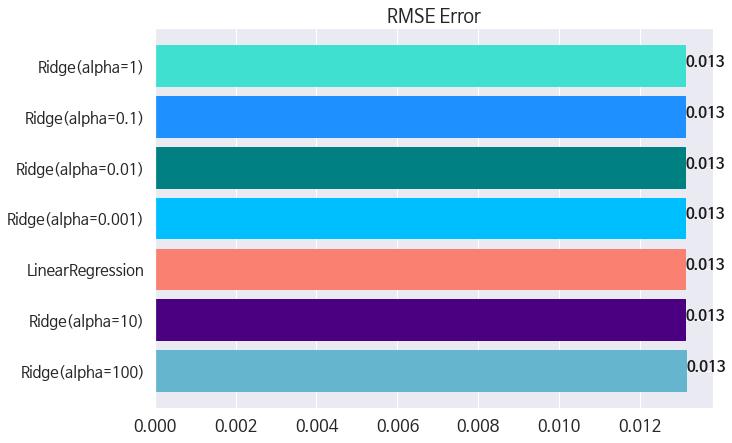

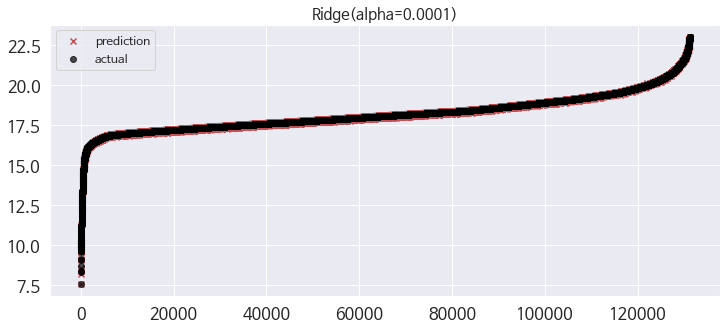

                 model    rmse
0     Ridge(alpha=100) 0.01313
1      Ridge(alpha=10) 0.01311
2     LinearRegression 0.01311
3  Ridge(alpha=0.0001) 0.01311
4   Ridge(alpha=0.001) 0.01311
5    Ridge(alpha=0.01) 0.01311
6     Ridge(alpha=0.1) 0.01311
7       Ridge(alpha=1) 0.01311


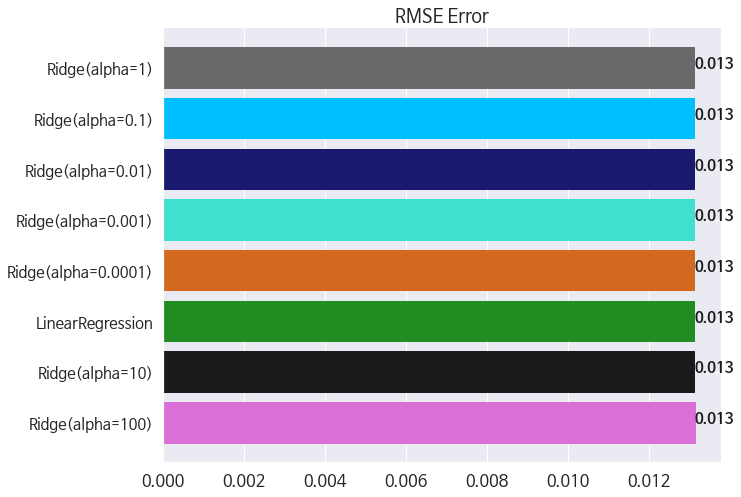

In [134]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    mse_eval('Ridge(alpha={})'.format(alpha), pred, y_test)

**Lasso**

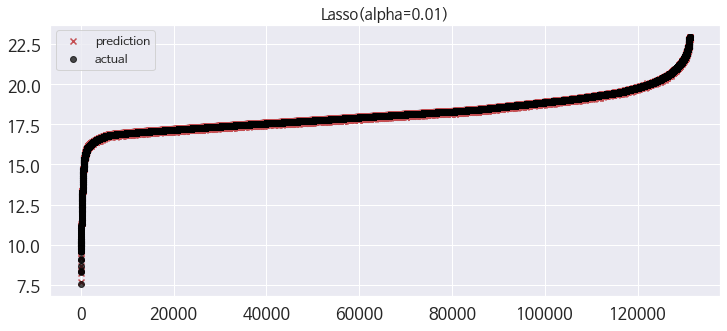

                 model    rmse
0    Lasso(alpha=0.01) 0.01578
1     Ridge(alpha=100) 0.01313
2      Ridge(alpha=10) 0.01311
3     LinearRegression 0.01311
4  Ridge(alpha=0.0001) 0.01311
5   Ridge(alpha=0.001) 0.01311
6    Ridge(alpha=0.01) 0.01311
7     Ridge(alpha=0.1) 0.01311
8       Ridge(alpha=1) 0.01311


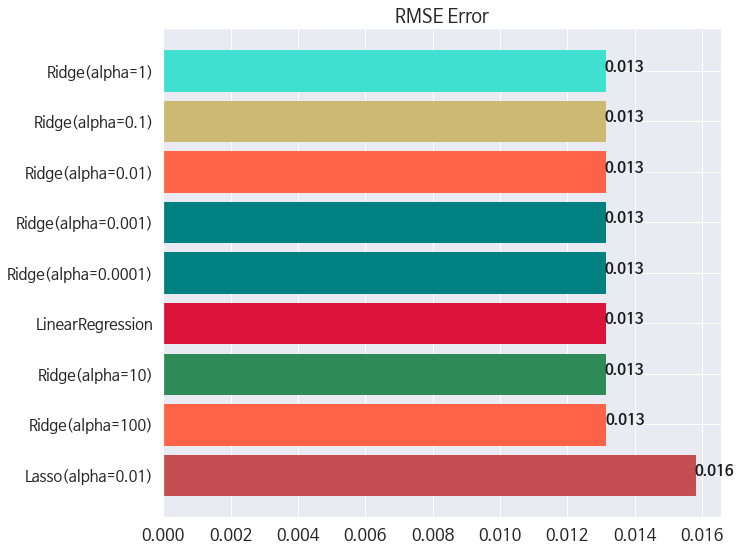

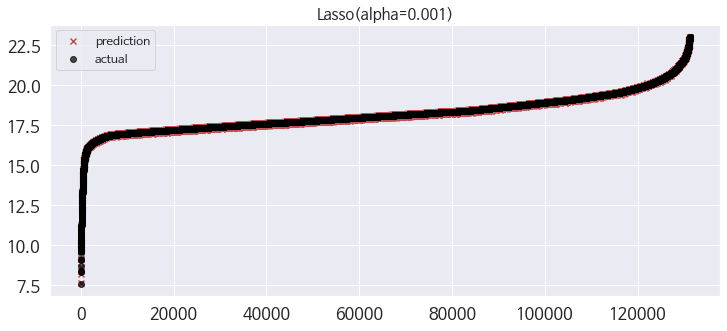

                 model    rmse
0    Lasso(alpha=0.01) 0.01578
1   Lasso(alpha=0.001) 0.01319
2     Ridge(alpha=100) 0.01313
3      Ridge(alpha=10) 0.01311
4     LinearRegression 0.01311
5  Ridge(alpha=0.0001) 0.01311
6   Ridge(alpha=0.001) 0.01311
7    Ridge(alpha=0.01) 0.01311
8     Ridge(alpha=0.1) 0.01311
9       Ridge(alpha=1) 0.01311


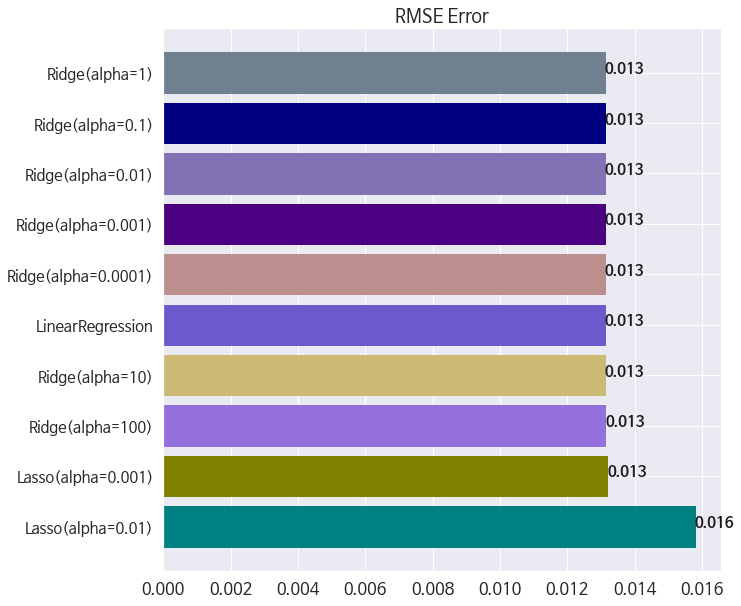

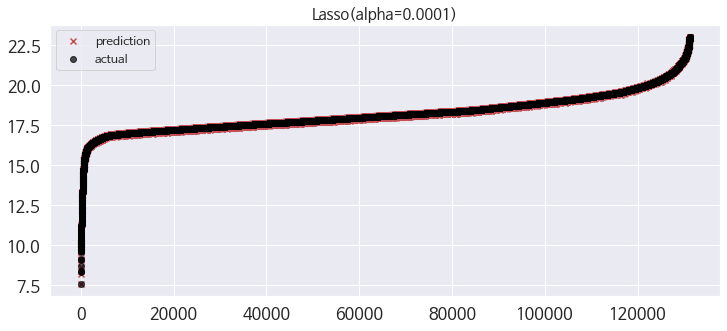

                  model    rmse
0     Lasso(alpha=0.01) 0.01578
1    Lasso(alpha=0.001) 0.01319
2      Ridge(alpha=100) 0.01313
3   Lasso(alpha=0.0001) 0.01313
4       Ridge(alpha=10) 0.01311
5      LinearRegression 0.01311
6   Ridge(alpha=0.0001) 0.01311
7    Ridge(alpha=0.001) 0.01311
8     Ridge(alpha=0.01) 0.01311
9      Ridge(alpha=0.1) 0.01311
10       Ridge(alpha=1) 0.01311


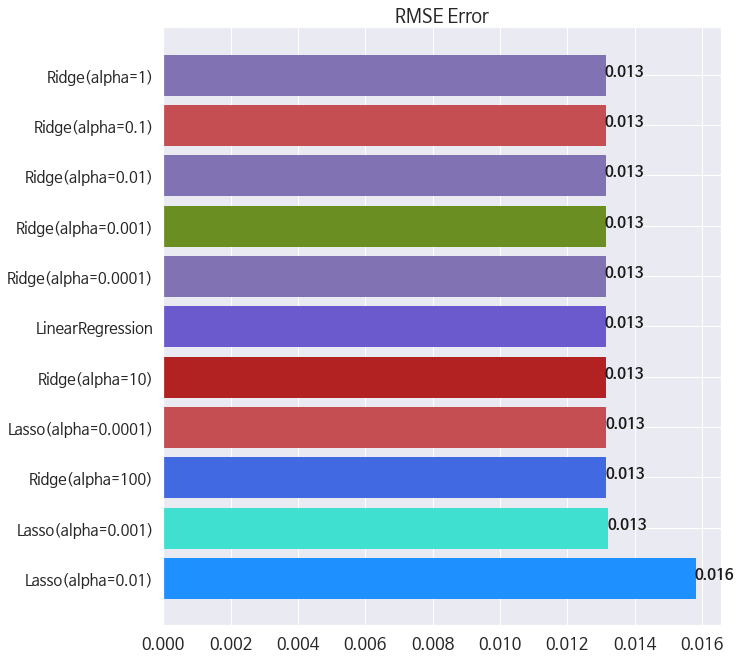

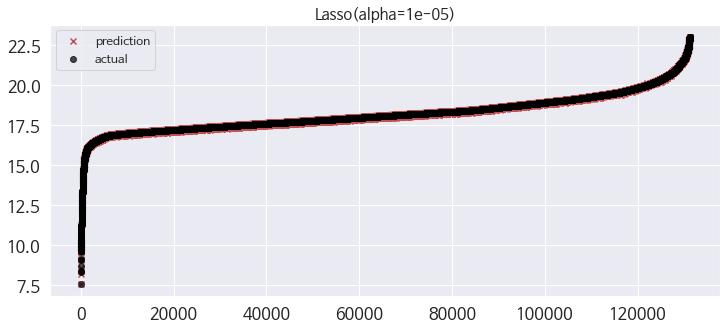

                  model    rmse
0     Lasso(alpha=0.01) 0.01578
1    Lasso(alpha=0.001) 0.01319
2      Ridge(alpha=100) 0.01313
3   Lasso(alpha=0.0001) 0.01313
4    Lasso(alpha=1e-05) 0.01311
5       Ridge(alpha=10) 0.01311
6      LinearRegression 0.01311
7   Ridge(alpha=0.0001) 0.01311
8    Ridge(alpha=0.001) 0.01311
9     Ridge(alpha=0.01) 0.01311
10     Ridge(alpha=0.1) 0.01311
11       Ridge(alpha=1) 0.01311


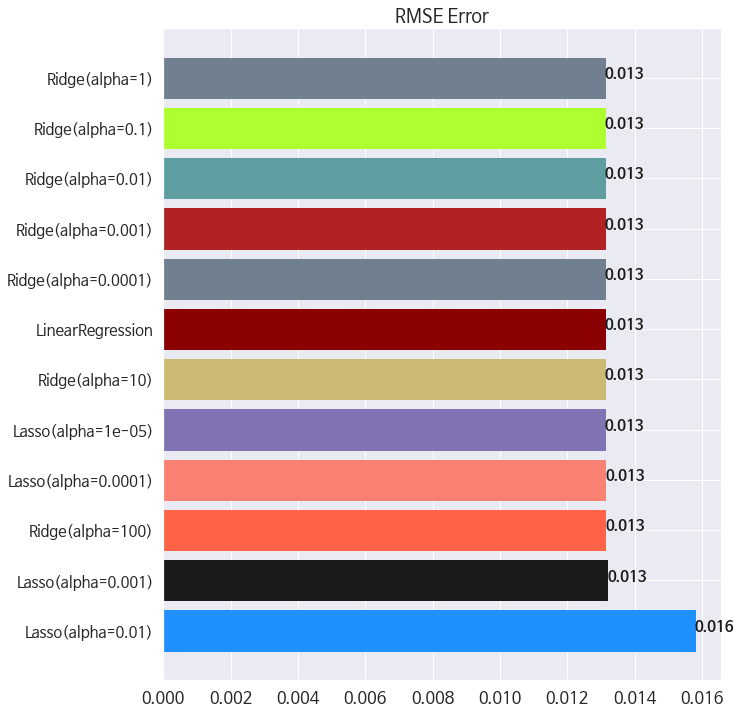

In [135]:
alphas = [0.01, 0.001, 0.0001, 0.00001]

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

**ElasticNet**

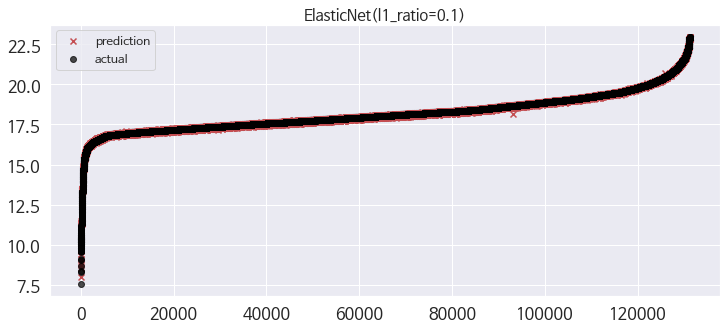

                       model    rmse
0   ElasticNet(l1_ratio=0.1) 0.02213
1          Lasso(alpha=0.01) 0.01578
2         Lasso(alpha=0.001) 0.01319
3           Ridge(alpha=100) 0.01313
4        Lasso(alpha=0.0001) 0.01313
5         Lasso(alpha=1e-05) 0.01311
6            Ridge(alpha=10) 0.01311
7           LinearRegression 0.01311
8        Ridge(alpha=0.0001) 0.01311
9         Ridge(alpha=0.001) 0.01311
10         Ridge(alpha=0.01) 0.01311
11          Ridge(alpha=0.1) 0.01311
12            Ridge(alpha=1) 0.01311


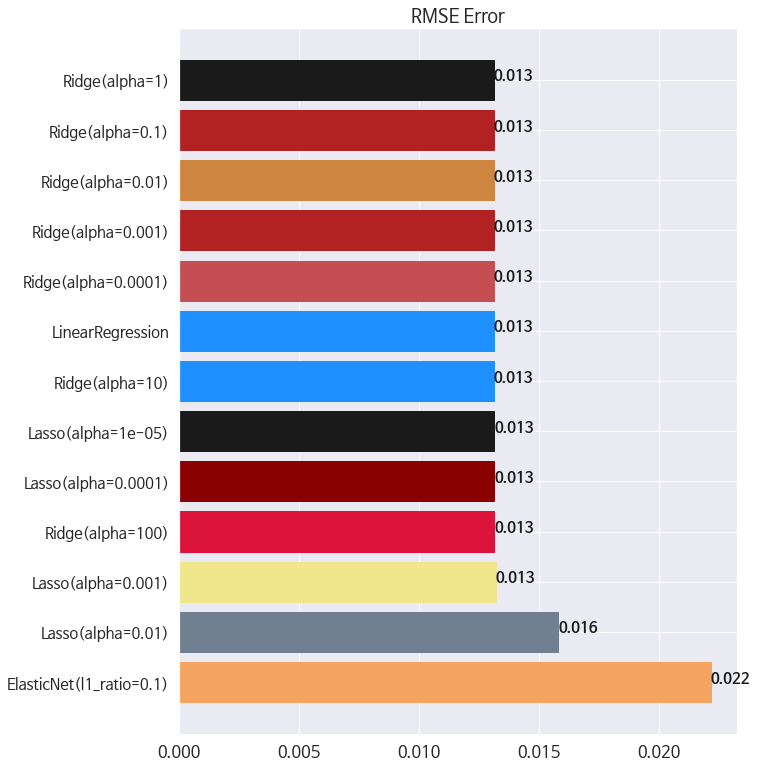

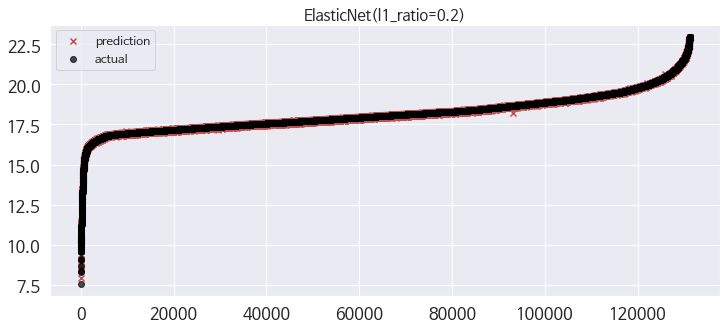

                       model    rmse
0   ElasticNet(l1_ratio=0.1) 0.02213
1   ElasticNet(l1_ratio=0.2) 0.02085
2          Lasso(alpha=0.01) 0.01578
3         Lasso(alpha=0.001) 0.01319
4           Ridge(alpha=100) 0.01313
5        Lasso(alpha=0.0001) 0.01313
6         Lasso(alpha=1e-05) 0.01311
7            Ridge(alpha=10) 0.01311
8           LinearRegression 0.01311
9        Ridge(alpha=0.0001) 0.01311
10        Ridge(alpha=0.001) 0.01311
11         Ridge(alpha=0.01) 0.01311
12          Ridge(alpha=0.1) 0.01311
13            Ridge(alpha=1) 0.01311


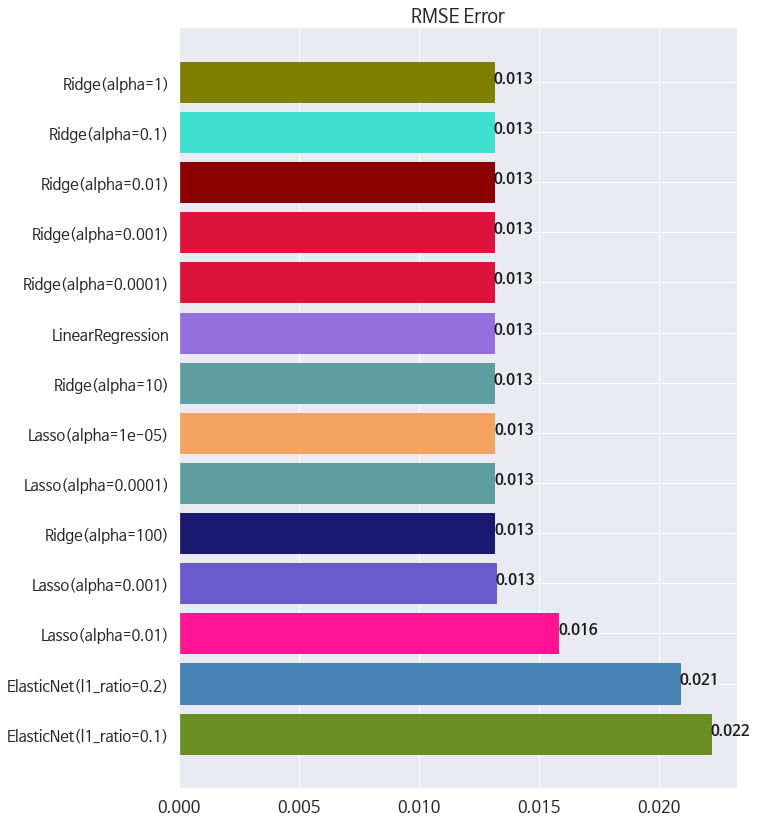

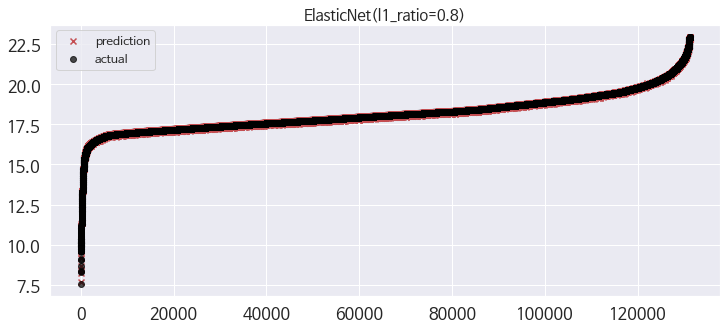

                       model    rmse
0   ElasticNet(l1_ratio=0.1) 0.02213
1   ElasticNet(l1_ratio=0.2) 0.02085
2   ElasticNet(l1_ratio=0.8) 0.01580
3          Lasso(alpha=0.01) 0.01578
4         Lasso(alpha=0.001) 0.01319
5           Ridge(alpha=100) 0.01313
6        Lasso(alpha=0.0001) 0.01313
7         Lasso(alpha=1e-05) 0.01311
8            Ridge(alpha=10) 0.01311
9           LinearRegression 0.01311
10       Ridge(alpha=0.0001) 0.01311
11        Ridge(alpha=0.001) 0.01311
12         Ridge(alpha=0.01) 0.01311
13          Ridge(alpha=0.1) 0.01311
14            Ridge(alpha=1) 0.01311


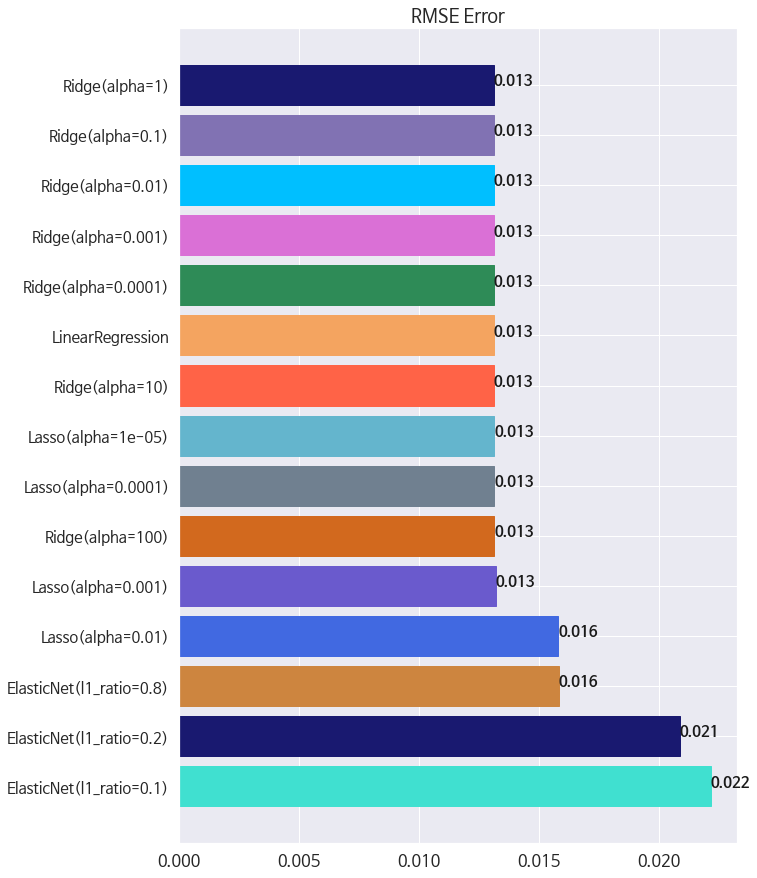

In [136]:
ratios = [0.1, 0.2, 0.8]

for ratio in ratios:
    elasticnet = ElasticNet(alpha=0.01, l1_ratio=ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)

**Polynomial Features**

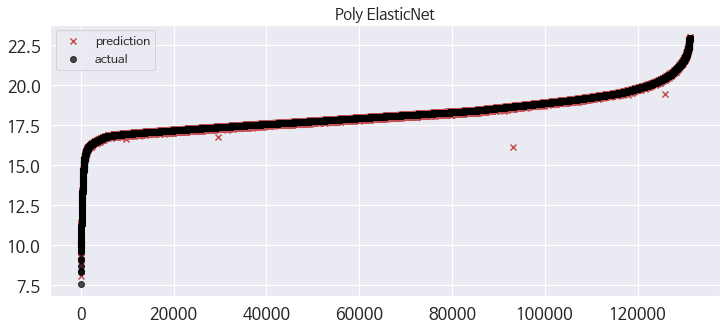

                       model    rmse
0   ElasticNet(l1_ratio=0.1) 0.02213
1   ElasticNet(l1_ratio=0.2) 0.02085
2            Poly ElasticNet 0.01923
3   ElasticNet(l1_ratio=0.8) 0.01580
4          Lasso(alpha=0.01) 0.01578
5         Lasso(alpha=0.001) 0.01319
6           Ridge(alpha=100) 0.01313
7        Lasso(alpha=0.0001) 0.01313
8         Lasso(alpha=1e-05) 0.01311
9            Ridge(alpha=10) 0.01311
10          LinearRegression 0.01311
11       Ridge(alpha=0.0001) 0.01311
12        Ridge(alpha=0.001) 0.01311
13         Ridge(alpha=0.01) 0.01311
14          Ridge(alpha=0.1) 0.01311
15            Ridge(alpha=1) 0.01311


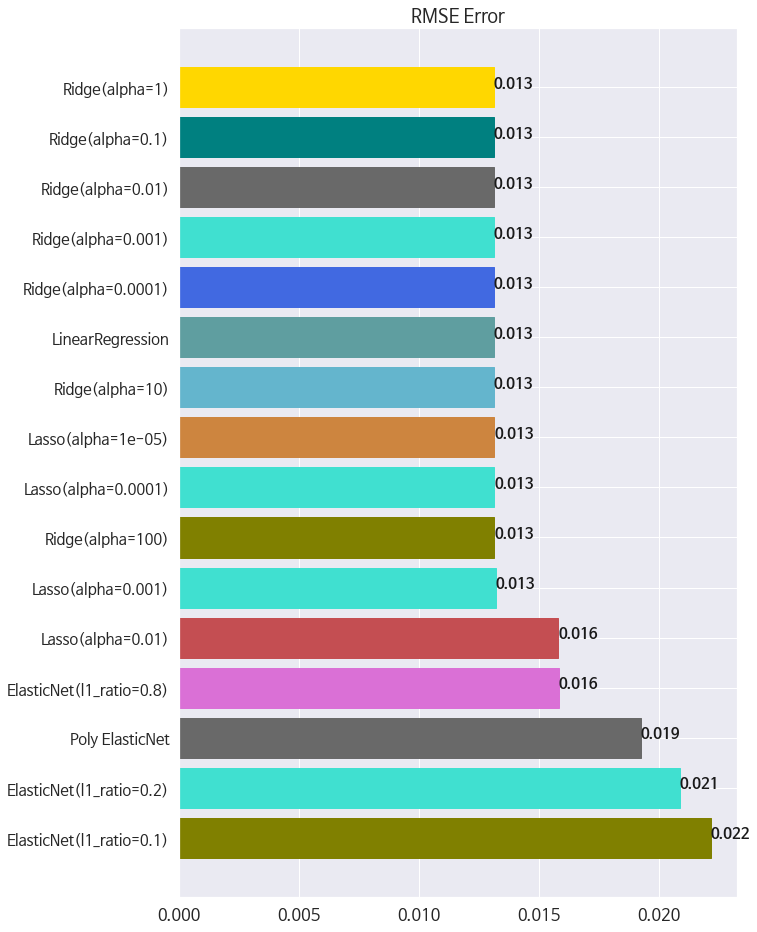

In [137]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    ElasticNet(alpha=0.01, l1_ratio=0.01)
)

poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

mse_eval('Poly ElasticNet', poly_pred, y_test)

**GradientBoost**

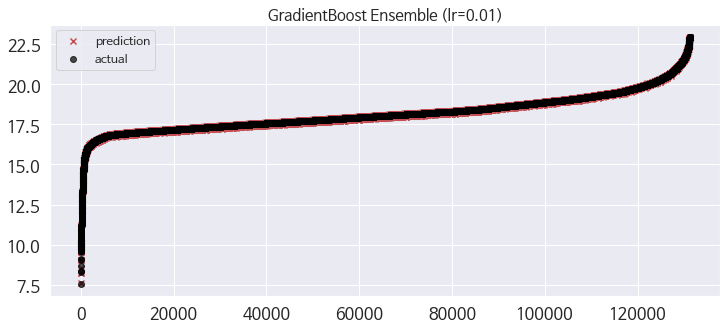

                               model    rmse
0           ElasticNet(l1_ratio=0.1) 0.02213
1           ElasticNet(l1_ratio=0.2) 0.02085
2                    Poly ElasticNet 0.01923
3           ElasticNet(l1_ratio=0.8) 0.01580
4                  Lasso(alpha=0.01) 0.01578
5                 Lasso(alpha=0.001) 0.01319
6                   Ridge(alpha=100) 0.01313
7                Lasso(alpha=0.0001) 0.01313
8                 Lasso(alpha=1e-05) 0.01311
9                    Ridge(alpha=10) 0.01311
10                  LinearRegression 0.01311
11               Ridge(alpha=0.0001) 0.01311
12                Ridge(alpha=0.001) 0.01311
13                 Ridge(alpha=0.01) 0.01311
14                  Ridge(alpha=0.1) 0.01311
15                    Ridge(alpha=1) 0.01311
16  GradientBoost Ensemble (lr=0.01) 0.01304


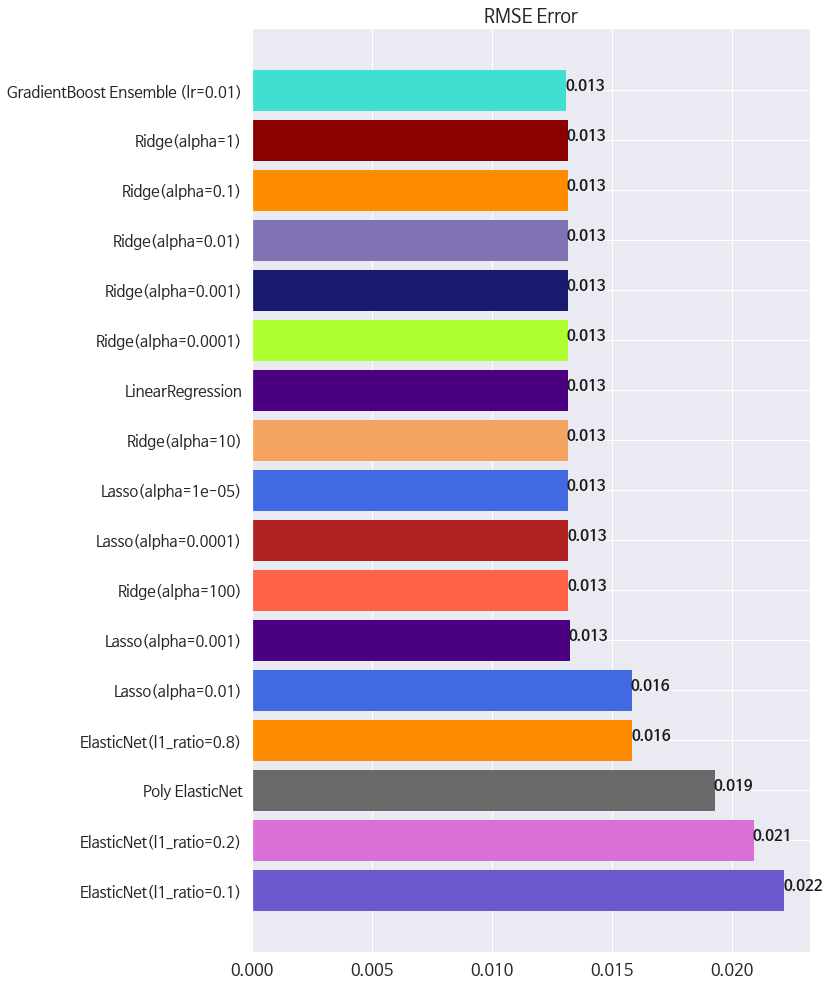

In [138]:
gbr = GradientBoostingRegressor(random_state=42, learning_rate=0.01, n_estimators=1000, subsample=0.8)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost Ensemble (lr=0.01)', gbr_pred, y_test)

**XGBoost**

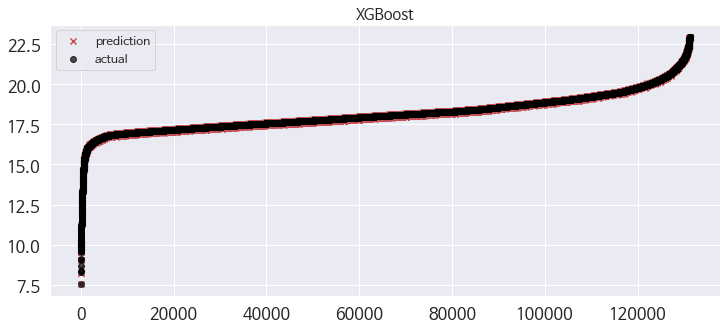

                               model    rmse
0           ElasticNet(l1_ratio=0.1) 0.02213
1           ElasticNet(l1_ratio=0.2) 0.02085
2                    Poly ElasticNet 0.01923
3           ElasticNet(l1_ratio=0.8) 0.01580
4                  Lasso(alpha=0.01) 0.01578
5                 Lasso(alpha=0.001) 0.01319
6                   Ridge(alpha=100) 0.01313
7                Lasso(alpha=0.0001) 0.01313
8                 Lasso(alpha=1e-05) 0.01311
9                    Ridge(alpha=10) 0.01311
10                  LinearRegression 0.01311
11               Ridge(alpha=0.0001) 0.01311
12                Ridge(alpha=0.001) 0.01311
13                 Ridge(alpha=0.01) 0.01311
14                  Ridge(alpha=0.1) 0.01311
15                    Ridge(alpha=1) 0.01311
16  GradientBoost Ensemble (lr=0.01) 0.01304
17                           XGBoost 0.01295


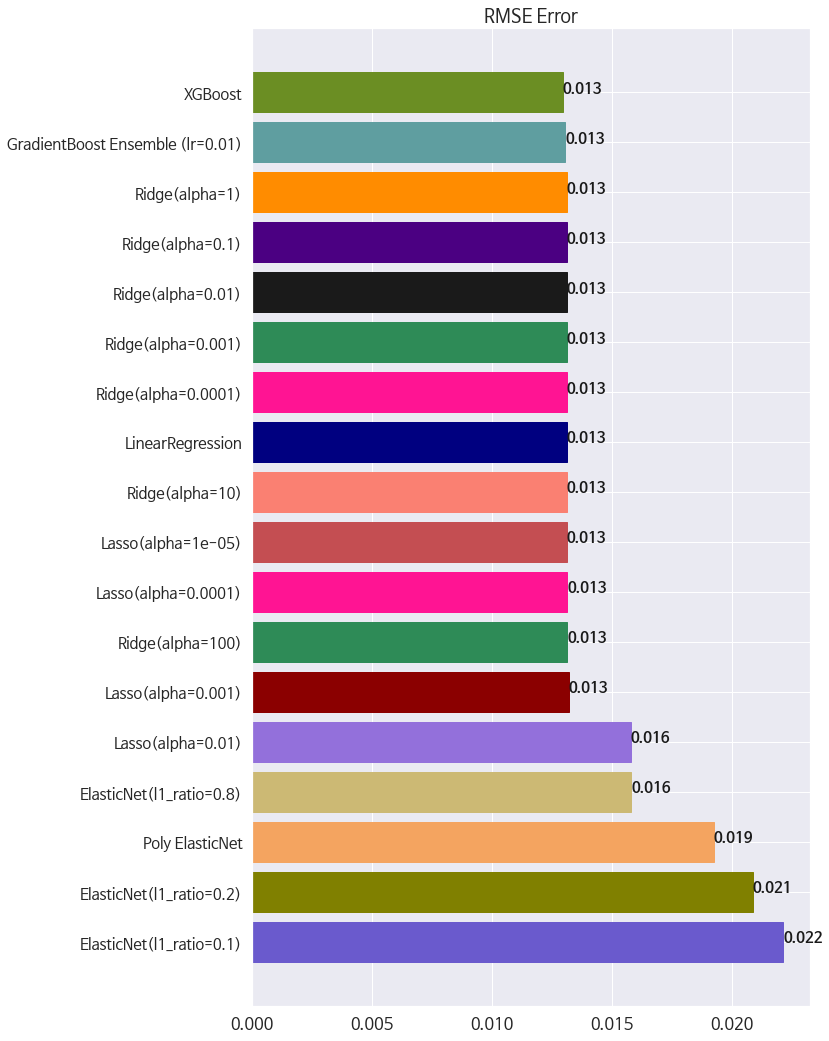

In [139]:
xgb = XGBRegressor(random_state=42, learning_rate=0.01, n_estimators=1000, subsample=0.8, max_depth=7)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
mse_eval('XGBoost', xgb_pred, y_test)

**LightGBM**

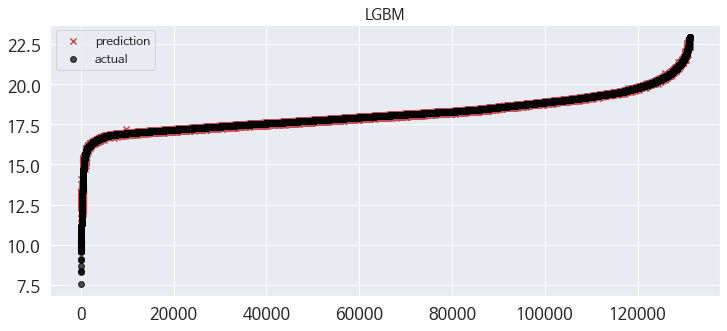

                               model    rmse
0                               LGBM 0.07102
1           ElasticNet(l1_ratio=0.1) 0.02213
2           ElasticNet(l1_ratio=0.2) 0.02085
3                    Poly ElasticNet 0.01923
4           ElasticNet(l1_ratio=0.8) 0.01580
5                  Lasso(alpha=0.01) 0.01578
6                 Lasso(alpha=0.001) 0.01319
7                   Ridge(alpha=100) 0.01313
8                Lasso(alpha=0.0001) 0.01313
9                 Lasso(alpha=1e-05) 0.01311
10                   Ridge(alpha=10) 0.01311
11                  LinearRegression 0.01311
12               Ridge(alpha=0.0001) 0.01311
13                Ridge(alpha=0.001) 0.01311
14                 Ridge(alpha=0.01) 0.01311
15                  Ridge(alpha=0.1) 0.01311
16                    Ridge(alpha=1) 0.01311
17  GradientBoost Ensemble (lr=0.01) 0.01304
18                           XGBoost 0.01295


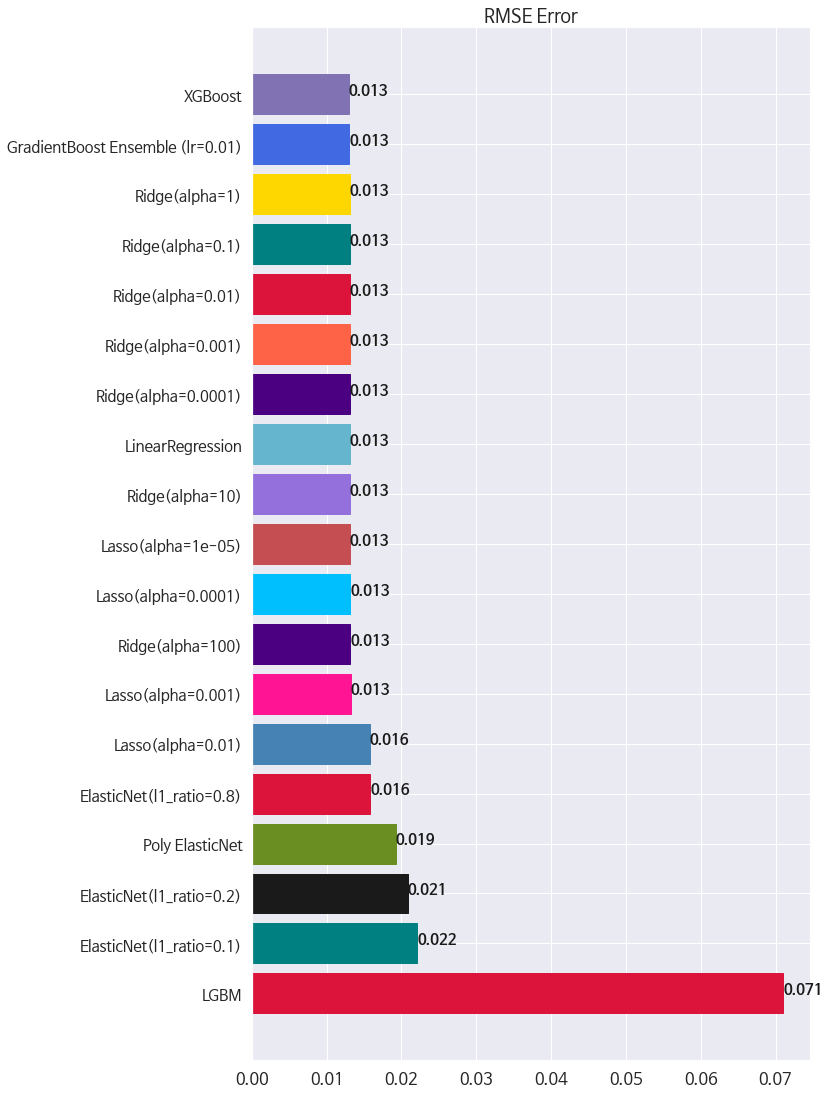

In [140]:
lgbm = LGBMRegressor(random_state=42, learning_rate=0.01, n_estimators=1000, colsample_bytree=0.9, subsample=0.9, max_depth=7)
lgbm.fit(x_train, y_train)
lgbm_pred = lgbm.predict(x_test)
mse_eval('LGBM', lgbm_pred, y_test)

**Weighted Blending**

**K-fold Cross Validation**

In [145]:
n_splits = 5
kfold = KFold(n_splits=n_splits)

In [146]:
X = np.array(train_df.drop('log_price', 1))
Y = np.array(train_df['log_price'])

In [147]:
xgb_fold = XGBRegressor(objective='reg:squarederror', random_state=42, learning_rate=0.01, n_estimators=1000, subsample=0.8, max_depth=7)

In [148]:
i = 1
total_error = 0

for train_index, test_index in kfold.split(X):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = Y[train_index], Y[test_index]
    xgb_pred_fold = xgb_fold.fit(x_train_fold, y_train_fold).predict(x_test_fold)
    error = sqrt(mean_squared_error(xgb_pred_fold, y_test_fold))
    print('Fold = {}, prediction score = {:.5f}'.format(i, error))
    total_error += error
    i+=1
print('---'*10)
print('Average Error: %s' % (total_error / n_splits))

Fold = 1, prediction score = 0.01305
Fold = 2, prediction score = 0.01279
Fold = 3, prediction score = 0.01253
Fold = 4, prediction score = 0.01336
Fold = 5, prediction score = 0.01318
------------------------------
Average Error: 0.012983548095143713


In [178]:
import statsmodels.api as sm

x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.407e+08
Date:                Fri, 03 Sep 2021   Prob (F-statistic):               0.00
Time:                        16:15:20   Log-Likelihood:             8.9484e+05
No. Observations:              306187   AIC:                        -1.790e+06
Df Residuals:                  306169   BIC:                        -1.789e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7941      0.051    -35.424      0.000      -1.893      -1.695
기초금액log        0.9997   5.15e-05   1.94e+04      0.000       1.000       1.000
추정금액log       -0.0011   5.25e-05    -21.723      0.000      -0.001      -0.001
연도(year)       0.0008    2.5e-05     33.439      0.000       0.001       0.001
월(month)       0.0046      0.001      4.797      0.000       0.003       0.006
일(day)         0.0001   3.15e-05      4.641      0.000    8.44e-05       0.000
dayofweek   3.177e-05    1.6e-05      1.980      0.048     3.2e-07    6.32e-05
weekofyear  4.232e-05   9.41e-06      4.497      0.000    2.39e-05    6.08e-05
dayofyear     -0.0002   3.14e-05     -4.910      0.000      -0.000   -9.26e-05
quarter    -7.931e-07   8.69e-05     -0.009      0.993      -0.000       0.000
서울특별시         -0.0008   9.94e-05     -8.068      0.000      -0.001      -0.001
인천광역시         -0.0004      0.000     -2.803      0.005      -0.001      -0.000
제한없음          -0.0017      0.000     -9.744      0.000      -0.002      -0.001
시설물유지관리공사     -0.0007   8.81e-05     -8.224      0.000      -0.001      -0.001
건축공사           0.0008      0.000      7.527      0.000       0.001       0.001
실내건축공사        -0.0001      0.000     -0.960      0.337      -0.000       0.000
석면해체제거공사      -0.0005      0.000     -2.548      0.011      -0.001      -0.000
비계·구조물해체공사     0.0005      0.000      2.304      0.021    7.81e-05       0.001
==============================================================================
Omnibus:                   317388.870   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25189508.804
Skew:                           5.169   Prob(JB):                         0.00
Kurtosis:                      46.216   Cond. No.                     4.36e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**심각한 스케일링 문제가 보인다. 금액들에 대한 로그변환 대신에 전체 데이터에 대한 스케일링이 필요해보인다.**<br>

In [224]:
n_train_data = df[['기초금액', '추정금액', '연도(year)', '월(month)', '일(day)', 'dayofweek', 'weekofyear', 'dayofyear', 'quarter',
               '서울특별시', '인천광역시', '제한없음', '시설물유지관리공사', '건축공사', '실내건축공사', '석면해체제거공사', 
               '비계·구조물해체공사', '낙찰금액']]

In [225]:
scaler = StandardScaler()

n_cols = n_train_data.columns
n_train_data = scaler.fit_transform(n_train_data)
n_train_data = pd.DataFrame(columns=n_cols, data=n_train_data)

In [226]:
n_train_data

,기초금액,추정금액,연도(year),월(month),일(day),dayofweek,weekofyear,dayofyear,quarter,서울특별시,인천광역시,제한없음,시설물유지관리공사,건축공사,실내건축공사,석면해체제거공사,비계·구조물해체공사,낙찰금액
0,-0.28444,-0.00255,-1.28601,-1.49597,-1.70408,-1.33245,-1.60261,-1.63005,-1.18828,-0.25589,-0.17026,-0.14644,-0.29592,-0.24378,-0.18421,-0.11660,-0.10421,-0.28504
1,-0.31325,-0.00258,-1.28601,-1.49597,-1.70408,-1.33245,-1.60261,-1.63005,-1.18828,-0.25589,-0.17026,-0.14644,-0.29592,-0.24378,-0.18421,-0.11660,-0.10421,-0.31592
2,2.00487,-0.00005,-1.28601,-1.49597,-1.70408,-1.33245,-1.60261,-1.63005,-1.18828,-0.25589,-0.17026,6.82881,-0.29592,-0.24378,-0.18421,-0.11660,-0.10421,1.98275
3,0.44680,-0.00175,-1.28601,-1.49597,-1.70408,-1.33245,-1.60261,-1.63005,-1.18828,3.90795,-0.17026,-0.14644,-0.29592,-0.24378,-0.18421,-0.11660,-0.10421,0.44691
4,0.99461,-0.00115,-1.28601,-1.49597,-1.70408,-1.33245,-1.60261,-1.63005,-1.18828,3.90795,-0.17026,-0.14644,-0.29592,-0.24378,-0.18421,-0.11660,-0.10421,1.01743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437405,-0.32737,-0.00259,1.70345,-0.30823,1.78751,-1.33245,-0.17425,-0.16776,-0.29840,-0.25589,-0.17026,-0.14644,-0.29592,-0.24378,-0.18421,-0.11660,-0.10421,-0.33012
437406,-0.32147,-0.00259,1.70345,-0.30823,1.78751,-1.33245,-0.17425,-0.16776,-0.29840,-0.25589,-0.17026,-0.14644,-0.29592,-0.24378,-0.18421,-0.11660,-0.10421,-0.32423
437407,0.77191,-0.00125,1.70345,-0.30823,1.78751,-1.33245,-0.17425,-0.16776,-0.29840,-0.25589,-0.17026,-0.14644,-0.29592,4.10211,-0.18421,-0.11660,-0.10421,0.79960
437408,-0.30608,-0.00257,1.70345,-0.30823,1.78751,-1.33245,-0.17425,-0.16776,-0.29840,-0.25589,-0.17026,-0.14644,-0.29592,-0.24378,-0.18421,-0.11660,-0.10421,-0.30633


In [236]:
n_train_features = n_train_data.drop('낙찰금액', axis=1)

In [237]:
n_train_features

,기초금액,추정금액,연도(year),월(month),일(day),dayofweek,weekofyear,dayofyear,quarter,서울특별시,인천광역시,제한없음,시설물유지관리공사,건축공사,실내건축공사,석면해체제거공사,비계·구조물해체공사
0,-0.28444,-0.00255,-1.28601,-1.49597,-1.70408,-1.33245,-1.60261,-1.63005,-1.18828,-0.25589,-0.17026,-0.14644,-0.29592,-0.24378,-0.18421,-0.11660,-0.10421
1,-0.31325,-0.00258,-1.28601,-1.49597,-1.70408,-1.33245,-1.60261,-1.63005,-1.18828,-0.25589,-0.17026,-0.14644,-0.29592,-0.24378,-0.18421,-0.11660,-0.10421
2,2.00487,-0.00005,-1.28601,-1.49597,-1.70408,-1.33245,-1.60261,-1.63005,-1.18828,-0.25589,-0.17026,6.82881,-0.29592,-0.24378,-0.18421,-0.11660,-0.10421
3,0.44680,-0.00175,-1.28601,-1.49597,-1.70408,-1.33245,-1.60261,-1.63005,-1.18828,3.90795,-0.17026,-0.14644,-0.29592,-0.24378,-0.18421,-0.11660,-0.10421
4,0.99461,-0.00115,-1.28601,-1.49597,-1.70408,-1.33245,-1.60261,-1.63005,-1.18828,3.90795,-0.17026,-0.14644,-0.29592,-0.24378,-0.18421,-0.11660,-0.10421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437405,-0.32737,-0.00259,1.70345,-0.30823,1.78751,-1.33245,-0.17425,-0.16776,-0.29840,-0.25589,-0.17026,-0.14644,-0.29592,-0.24378,-0.18421,-0.11660,-0.10421
437406,-0.32147,-0.00259,1.70345,-0.30823,1.78751,-1.33245,-0.17425,-0.16776,-0.29840,-0.25589,-0.17026,-0.14644,-0.29592,-0.24378,-0.18421,-0.11660,-0.10421
437407,0.77191,-0.00125,1.70345,-0.30823,1.78751,-1.33245,-0.17425,-0.16776,-0.29840,-0.25589,-0.17026,-0.14644,-0.29592,4.10211,-0.18421,-0.11660,-0.10421
437408,-0.30608,-0.00257,1.70345,-0.30823,1.78751,-1.33245,-0.17425,-0.16776,-0.29840,-0.25589,-0.17026,-0.14644,-0.29592,-0.24378,-0.18421,-0.11660,-0.10421


In [238]:
n_train_label = n_train_data['낙찰금액']

In [239]:
n_train_label

0        -0.28504
1        -0.31592
2         1.98275
3         0.44691
4         1.01743
           ...   
437405   -0.33012
437406   -0.32423
437407    0.79960
437408   -0.30633
437409   -0.33367
Name: 낙찰금액, Length: 437410, dtype: float64

In [240]:
x_train, x_test, y_train, y_test = train_test_split(n_train_features, n_train_label, test_size=0.3, random_state=42)

In [241]:
import statsmodels.api as sm

x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   낙찰금액   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.127e+08
Date:                Fri, 03 Sep 2021   Prob (F-statistic):               0.00
Time:                        16:51:22   Log-Likelihood:             9.0452e+05
No. Observations:              306187   AIC:                        -1.809e+06
Df Residuals:                  306169   BIC:                        -1.809e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.216e-05   2.28e-05     -0.972      0.331   -6.68e-05    2.25e-05
기초금액           0.9991   2.43e-05   4.11e+04      0.000       0.999       0.999
추정금액       -7.991e-07   1.91e-05     -0.042      0.967   -3.82e-05    3.66e-05
연도(year)       0.0012   2.42e-05     48.281      0.000       0.001       0.001
월(month)      -0.0093      0.003     -2.997      0.003      -0.015      -0.003
일(day)        -0.0008      0.000     -2.987      0.003      -0.001      -0.000
dayofweek   9.012e-05   2.28e-05      3.952      0.000    4.54e-05       0.000
weekofyear     0.0003      0.000      1.868      0.062   -1.23e-05       0.001
dayofyear      0.0098      0.003      3.144      0.002       0.004       0.016
quarter       -0.0004   9.45e-05     -4.653      0.000      -0.001      -0.000
서울특별시          0.0003    2.3e-05     12.520      0.000       0.000       0.000
인천광역시          0.0001   2.29e-05      5.742      0.000    8.64e-05       0.000
제한없음           0.0007   2.36e-05     30.801      0.000       0.001       0.001
시설물유지관리공사      0.0001   2.31e-05      6.375      0.000       0.000       0.000
건축공사           0.0017   2.38e-05     71.524      0.000       0.002       0.002
실내건축공사      -7.55e-05   2.29e-05     -3.294      0.001      -0.000   -3.06e-05
석면해체제거공사    -7.28e-05   2.27e-05     -3.202      0.001      -0.000   -2.82e-05
비계·구조물해체공사 -5.337e-05   2.27e-05     -2.353      0.019   -9.78e-05   -8.92e-06
==============================================================================
Omnibus:                   418700.395   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      16839804200.433
Skew:                           6.287   Prob(JB):                         0.00
Kurtosis:                    1151.827   Cond. No.                         388.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**추정금액은 유의성이 없어보이므로 제거**

In [242]:
print('Parameters: ', model.params)
print('R2: ', model.rsquared)

Parameters:  const        -0.00002
기초금액          0.99908
추정금액         -0.00000
연도(year)      0.00117
월(month)     -0.00931
일(day)       -0.00078
dayofweek     0.00009
weekofyear    0.00025
dayofyear     0.00981
quarter      -0.00044
서울특별시         0.00029
인천광역시         0.00013
제한없음          0.00073
시설물유지관리공사     0.00015
건축공사          0.00170
실내건축공사       -0.00008
석면해체제거공사     -0.00007
비계·구조물해체공사   -0.00005
dtype: float64
R2:  0.9998402742568204


**다중 공선성 피처 알아보기**

In [243]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

In [244]:
vif['feature'] = x_train.columns
vif

,VIF Factor,feature
0,1.00003,const
1,1.13265,기초금액
2,1.00001,추정금액
3,1.12951,연도(year)
4,18607.47071,월(month)
5,132.41154,일(day)
6,1.00151,dayofweek
7,34.64575,weekofyear
8,18781.16918,dayofyear
9,17.22959,quarter


**월(month), 일(day), weekofyear, dayofyear, quarter에서 심각한 다중공선성이 보이므로 제거**

In [251]:
n_train_features2 = n_train_data.drop(['낙찰금액', '월(month)', '일(day)', 'weekofyear', 'dayofyear', 'quarter', '추정금액'], axis=1)

In [252]:
n_train_features2

,기초금액,연도(year),dayofweek,서울특별시,인천광역시,제한없음,시설물유지관리공사,건축공사,실내건축공사,석면해체제거공사,비계·구조물해체공사
0,-0.28444,-1.28601,-1.33245,-0.25589,-0.17026,-0.14644,-0.29592,-0.24378,-0.18421,-0.11660,-0.10421
1,-0.31325,-1.28601,-1.33245,-0.25589,-0.17026,-0.14644,-0.29592,-0.24378,-0.18421,-0.11660,-0.10421
2,2.00487,-1.28601,-1.33245,-0.25589,-0.17026,6.82881,-0.29592,-0.24378,-0.18421,-0.11660,-0.10421
3,0.44680,-1.28601,-1.33245,3.90795,-0.17026,-0.14644,-0.29592,-0.24378,-0.18421,-0.11660,-0.10421
4,0.99461,-1.28601,-1.33245,3.90795,-0.17026,-0.14644,-0.29592,-0.24378,-0.18421,-0.11660,-0.10421
...,...,...,...,...,...,...,...,...,...,...,...
437405,-0.32737,1.70345,-1.33245,-0.25589,-0.17026,-0.14644,-0.29592,-0.24378,-0.18421,-0.11660,-0.10421
437406,-0.32147,1.70345,-1.33245,-0.25589,-0.17026,-0.14644,-0.29592,-0.24378,-0.18421,-0.11660,-0.10421
437407,0.77191,1.70345,-1.33245,-0.25589,-0.17026,-0.14644,-0.29592,4.10211,-0.18421,-0.11660,-0.10421
437408,-0.30608,1.70345,-1.33245,-0.25589,-0.17026,-0.14644,-0.29592,-0.24378,-0.18421,-0.11660,-0.10421


In [253]:
n_train_label2 = n_train_data['낙찰금액']

In [254]:
n_train_label2

0        -0.28504
1        -0.31592
2         1.98275
3         0.44691
4         1.01743
           ...   
437405   -0.33012
437406   -0.32423
437407    0.79960
437408   -0.30633
437409   -0.33367
Name: 낙찰금액, Length: 437410, dtype: float64

In [257]:
x_train, x_test, y_train, y_test = train_test_split(n_train_features2, n_train_label2, test_size=0.3, random_state=42)

In [258]:
import statsmodels.api as sm

x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   낙찰금액   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.741e+08
Date:                Fri, 03 Sep 2021   Prob (F-statistic):               0.00
Time:                        16:55:35   Log-Likelihood:             9.0440e+05
No. Observations:              306187   AIC:                        -1.809e+06
Df Residuals:                  306175   BIC:                        -1.809e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.185e-05   2.28e-05     -0.958      0.338   -6.65e-05    2.28e-05
기초금액           0.9991   2.43e-05   4.11e+04      0.000       0.999       0.999
연도(year)       0.0011   2.28e-05     49.058      0.000       0.001       0.001
dayofweek   8.378e-05   2.28e-05      3.675      0.000    3.91e-05       0.000
서울특별시          0.0003    2.3e-05     12.816      0.000       0.000       0.000
인천광역시          0.0001   2.29e-05      5.638      0.000    8.41e-05       0.000
제한없음           0.0007   2.36e-05     30.786      0.000       0.001       0.001
시설물유지관리공사      0.0002    2.3e-05      6.913      0.000       0.000       0.000
건축공사           0.0017   2.37e-05     72.579      0.000       0.002       0.002
실내건축공사     -5.826e-05   2.29e-05     -2.546      0.011      -0.000   -1.34e-05
석면해체제거공사   -4.833e-05   2.27e-05     -2.131      0.033   -9.28e-05   -3.88e-06
비계·구조물해체공사 -5.646e-05   2.27e-05     -2.489      0.013      -0.000    -1.2e-05
==============================================================================
Omnibus:                   418159.689   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      16790551125.272
Skew:                           6.269   Prob(JB):                         0.00
Kurtosis:                    1150.146   Cond. No.                         1.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""